In [3]:
import sys
sys.path.insert(0, "/home/afreiburger/env_packages/lib/python3.11/site-packages")

from os import system
import sys
# print(system("path"))
display(sys.path)

['/home/afreiburger/env_packages/lib/python3.11/site-packages',
 '/scratch/shared/code/MicrobiomeNotebooks/WesternDietMicrobiomes',
 '/usr/local/lib/python311.zip',
 '/usr/local/lib/python3.11',
 '/usr/local/lib/python3.11/lib-dynload',
 '',
 '/home/afreiburger/.local/lib/python3.11/site-packages',
 '/usr/local/lib/python3.11/site-packages']

# western diet media modeling

In [ ]:
from pandas import read_csv
biggDB = read_csv("BiGG_DB.txt", sep="\t")
biggIDName = dict(zip(biggDB["universal_bigg_id"].to_numpy(), biggDB["name"].to_numpy()))

## process the VHM WD media

In [1]:
import os
print(os.getcwd())

/scratch/shared/code/MicrobiomeNotebooks/WesternDietMicrobiomes


In [10]:
print(mapping["etoh"])

cpd00363


In [21]:
from pandas import read_csv
media = read_csv("VHM_highFat_lowFiber_media.tsv", sep="\t")
mediaFluxes = dict(zip(media["Reaction"].to_numpy(), media["Flux Value"].to_numpy()))
media.set_index("Reaction", inplace=True)
display(media)

exchangedCpds = [s.replace("[e]", "").replace("EX_", "") for s in media.index]

from json import load
mapping = load(open("../../CommScores/commscores/data/BiGG_to_MSID.json", 'r'))
names = []
missedCPDs = []
for m in exchangedCpds:
    # print(m)
    if m not in mapping:
        missedCPDs.append(m)
        names.append(m)
    else:   names.append(mapping[m])

media["ModelSEED ID"] = names
display(media)
    
print(len(missedCPDs), len(exchangedCpds), missedCPDs)

,Flux Value
Reaction,
EX_etoh[e],0.000000
EX_h2o[e],158601.920148
EX_caro[e],0.001620
EX_retinol[e],3.106982
EX_thm[e],1.808900
...,...
EX_lgnc[e],0.205669
EX_fol[e],0.000119
EX_strch1[e],0.068690


,Flux Value,ModelSEED ID
Reaction,,
EX_etoh[e],0.000000,cpd00363
EX_h2o[e],158601.920148,cpd00001
EX_caro[e],0.001620,cpd01420
EX_retinol[e],3.106982,cpd00365
EX_thm[e],1.808900,cpd00305
...,...,...
EX_lgnc[e],0.205669,cpd05235
EX_fol[e],0.000119,cpd00393
EX_strch1[e],0.068690,strch1


37 91 ['adpcbl', 'pnto_R', 'ascb_L', 'phyQ', 'mn2(e)', 'zn2(e)', 'mnl(e)', 'sbt_D', 'glc_D', 'cellul(e)', 'ala_L', 'arg_L', 'asp_L', 'cys_L', 'glu_L', 'his_L', 'ile_L', 'leu_L', 'lys_L', 'met_L', 'phe_L', 'pro_L', 'ser_L', 'thr_L', 'trp_L', 'tyr_L', 'val_L', 'lnlc', 'lnlnca', 'strdnc', 'CE2510', 'CE4843', 'docosac', 'doco13ac', 'crvnc', 'strch1', 'starch1200(e)']


In [5]:
missedNames = {}
for m in missedCPDs:
    if m in biggIDName:   missedNames[m] = biggIDName[m]
    elif m.replace("_", "__") in biggIDName:   missedNames[m] = biggIDName[m.replace("_", "__")]
    else:  print(m)

print()
display(missedNames)

adpcbl
phyQ
mn2(e)
zn2(e)
mnl(e)
cellul(e)
starch1200(e)



{'pnto_R': '(R)-Pantothenate',
 'ascb_L': 'L-Ascorbate',
 'sbt_D': 'D-Sorbitol',
 'glc_D': 'D-Glucose',
 'ala_L': 'L-Alanine',
 'arg_L': 'L-Arginine',
 'asp_L': 'L-Aspartate',
 'cys_L': 'L-Cysteine',
 'glu_L': 'L-Glutamate',
 'his_L': 'L-Histidine',
 'ile_L': 'L-Isoleucine',
 'leu_L': 'L-Leucine',
 'lys_L': 'L-Lysine',
 'met_L': 'L-Methionine',
 'phe_L': 'L-Phenylalanine',
 'pro_L': 'L-Proline',
 'ser_L': 'L-Serine',
 'thr_L': 'L-Threonine',
 'trp_L': 'L-Tryptophan',
 'tyr_L': 'L-Tyrosine',
 'val_L': 'L-Valine',
 'lnlc': 'Linoleic acid (all cis C18:2) n-6',
 'lnlnca': 'Alpha-Linolenic acid, C18:3, n-3',
 'strdnc': 'Stearidonic acid C18:4, n-3',
 'CE2510': '11-cis-eicosenoate',
 'CE4843': 'Cis,cis-11,14-eicosadienoyl-CoA',
 'docosac': 'Behenate, Docosanoate',
 'doco13ac': '13Z)-13-docosenoic acid',
 'crvnc': 'Cervonic acid, C22:6 n-3',
 'strch1': 'Starch, structure 1 (1,6-{7[1,4-Glc], 4[1,4-Glc]})'}

### load the manually mapped 

In [25]:
from pandas import read_csv

media_mapping = read_csv("ModelSEED_Compound_Mapping.csv")
ids = list(missedNames.keys())+["adpcbl", "phyQ"]
media_mapping["IDs"] = [f"EX_{x}[e]" for x in ids]+["EX_mn2(e)", "EX_zn2(e)", "EX_mnl(e)", "EX_cellul(e)"]
media_mapping.set_index("IDs", inplace=True)
display(media_mapping)

,Compound Name,ModelSEED ID
IDs,,
EX_pnto_R[e],(R)-Pantothenate,cpd00644
EX_ascb_L[e],L-Ascorbate,cpd00059
EX_sbt_D[e],D-Sorbitol,cpd00588
EX_glc_D[e],D-Glucose,cpd00027
EX_ala_L[e],L-Alanine,cpd00035
EX_arg_L[e],L-Arginine,cpd00051
EX_asp_L[e],L-Aspartate,cpd00041
EX_cys_L[e],L-Cysteine,cpd00084
EX_glu_L[e],L-Glutamate,cpd00053


In [29]:
media.update(media_mapping)
# media.drop("EX_starch1200(e)", inplace=True)
display(media)
media.to_csv("MSID_media.csv")

print([x for x in media["ModelSEED ID"] if "cpd" not in x])

,Flux Value,ModelSEED ID
Reaction,,
EX_etoh[e],0.000000,cpd00363
EX_h2o[e],158601.920148,cpd00001
EX_caro[e],0.001620,cpd01420
EX_retinol[e],3.106982,cpd00365
EX_thm[e],1.808900,cpd00305
...,...,...
EX_hdcea[e],17.342837,cpd05274
EX_lgnc[e],0.205669,cpd05235
EX_fol[e],0.000119,cpd00393


[]


In [31]:
from json import dump

# wdMedia = dict(zip(list(media.index), list(media["ModelSEED ID"])))
# dump(wdMedia, open("WD_media.json", 'w'), indent=3)

wdMedia = dict(zip([f"EX_{x}_e0" for x in media["ModelSEED ID"]], list(media["Flux Value"])))
dump(wdMedia, open("WD_media.json", 'w'), indent=3)

## RC media

In [33]:
from pandas import read_csv
media = read_csv("highFiber.tsv", sep="\t")
mediaFluxes = dict(zip(media["Reaction"].to_numpy(), media["Flux Value"].to_numpy()))
media.set_index("Reaction", inplace=True)
display(media)

exchangedCpds = [s.replace("[e]", "").replace("EX_", "") for s in media.index]

from json import load
mapping = load(open("../../CommScores/commscores/data/BiGG_to_MSID.json", 'r'))
names = []
missedCPDs = []
for m in exchangedCpds:
    # print(m)
    if m not in mapping:
        missedCPDs.append(m)
        names.append(m)
    else:   names.append(mapping[m])

media["ModelSEED ID"] = names
display(media)
    
print(len(missedCPDs), len(exchangedCpds), missedCPDs)

,Flux Value
Reaction,
EX_etoh[e],22.792196
EX_h2o[e],181671.336776
EX_caro[e],0.013132
EX_retinol[e],1.099662
EX_thm[e],7.235601
...,...
EX_lgnc[e],0.166975
EX_fol[e],0.000273
EX_strch1[e],45.113962


,Flux Value,ModelSEED ID
Reaction,,
EX_etoh[e],22.792196,cpd00363
EX_h2o[e],181671.336776,cpd00001
EX_caro[e],0.013132,cpd01420
EX_retinol[e],1.099662,cpd00365
EX_thm[e],7.235601,cpd00305
...,...,...
EX_lgnc[e],0.166975,cpd05235
EX_fol[e],0.000273,cpd00393
EX_strch1[e],45.113962,strch1


37 91 ['adpcbl', 'pnto_R', 'ascb_L', 'phyQ', 'mn2(e)', 'zn2(e)', 'mnl(e)', 'cellul(e)', 'ala_L', 'arg_L', 'asp_L', 'cys_L', 'glu_L', 'his_L', 'ile_L', 'leu_L', 'lys_L', 'met_L', 'phe_L', 'pro_L', 'ser_L', 'thr_L', 'trp_L', 'tyr_L', 'val_L', 'lnlc', 'lnlnca', 'strdnc', 'CE2510', 'CE4843', 'docosac', 'doco13ac', 'crvnc', 'sbt_D', 'glc_D', 'strch1', 'starch1200(e)']


In [34]:
missedNames = {}
for m in missedCPDs:
    if m in biggIDName:   missedNames[m] = biggIDName[m]
    elif m.replace("_", "__") in biggIDName:   missedNames[m] = biggIDName[m.replace("_", "__")]
    else:  print(m)

print()
display(missedNames)

adpcbl
phyQ
mn2(e)
zn2(e)
mnl(e)
cellul(e)
starch1200(e)



{'pnto_R': '(R)-Pantothenate',
 'ascb_L': 'L-Ascorbate',
 'ala_L': 'L-Alanine',
 'arg_L': 'L-Arginine',
 'asp_L': 'L-Aspartate',
 'cys_L': 'L-Cysteine',
 'glu_L': 'L-Glutamate',
 'his_L': 'L-Histidine',
 'ile_L': 'L-Isoleucine',
 'leu_L': 'L-Leucine',
 'lys_L': 'L-Lysine',
 'met_L': 'L-Methionine',
 'phe_L': 'L-Phenylalanine',
 'pro_L': 'L-Proline',
 'ser_L': 'L-Serine',
 'thr_L': 'L-Threonine',
 'trp_L': 'L-Tryptophan',
 'tyr_L': 'L-Tyrosine',
 'val_L': 'L-Valine',
 'lnlc': 'Linoleic acid (all cis C18:2) n-6',
 'lnlnca': 'Alpha-Linolenic acid, C18:3, n-3',
 'strdnc': 'Stearidonic acid C18:4, n-3',
 'CE2510': '11-cis-eicosenoate',
 'CE4843': 'Cis,cis-11,14-eicosadienoyl-CoA',
 'docosac': 'Behenate, Docosanoate',
 'doco13ac': '13Z)-13-docosenoic acid',
 'crvnc': 'Cervonic acid, C22:6 n-3',
 'sbt_D': 'D-Sorbitol',
 'glc_D': 'D-Glucose',
 'strch1': 'Starch, structure 1 (1,6-{7[1,4-Glc], 4[1,4-Glc]})'}

In [36]:
from pandas import read_csv

media_mapping = read_csv("ModelSEED_Compound_Mapping.csv")
ids = list(missedNames.keys())+["adpcbl", "phyQ"]
media_mapping["IDs"] = [f"EX_{x}[e]" for x in ids]+["EX_mn2(e)", "EX_zn2(e)", "EX_mnl(e)", "EX_cellul(e)"]
media_mapping.set_index("IDs", inplace=True)
display(media_mapping)

media.update(media_mapping)
# media.drop("EX_starch1200(e)", inplace=True)
display(media)
media.to_csv("MSID_fiber_media.csv")

print([x for x in media["ModelSEED ID"] if "cpd" not in x])

,Compound Name,ModelSEED ID
IDs,,
EX_pnto_R[e],(R)-Pantothenate,cpd00644
EX_ascb_L[e],L-Ascorbate,cpd00059
EX_ala_L[e],D-Sorbitol,cpd00588
EX_arg_L[e],D-Glucose,cpd00027
EX_asp_L[e],L-Alanine,cpd00035
EX_cys_L[e],L-Arginine,cpd00051
EX_glu_L[e],L-Aspartate,cpd00041
EX_his_L[e],L-Cysteine,cpd00084
EX_ile_L[e],L-Glutamate,cpd00053


,Flux Value,ModelSEED ID
Reaction,,
EX_etoh[e],22.792196,cpd00363
EX_h2o[e],181671.336776,cpd00001
EX_caro[e],0.013132,cpd01420
EX_retinol[e],1.099662,cpd00365
EX_thm[e],7.235601,cpd00305
...,...,...
EX_hdcea[e],3.616985,cpd05274
EX_lgnc[e],0.166975,cpd05235
EX_fol[e],0.000273,cpd00393


[]


In [37]:
from json import dump
wdMedia = dict(zip([f"EX_{x}_e0" for x in media["ModelSEED ID"]], list(media["Flux Value"])))
dump(wdMedia, open("RC_media.json", 'w'), indent=3)

# Community flux processing

In [52]:
# processing a JSON version of the community flux
from pandas import DataFrame
from json import load
fluxesJSON = load(open("CommunityFluxSolution-NoFit.json", 'r'))

# fluxesJSON

fluxes = DataFrame(fluxesJSON)
fluxes.columns = [x.replace("-ABX", '') for x in fluxes.columns]
fluxes.head()

# for index, row in fluxes.iterrows():
#     if index == "solution":
        

,RC_-1.5,RC_1.5,RC_4.0,RC_6.0,RC_9.0,RC_12.5,WD_-1.5,WD_1.5,WD_4.0,WD_6.0,WD_9.0,WD_12.5
max_growth,3.241004,3.254481,3.235074,3.205190,3.166454,3.213163,4.629085,4.068008,3.942682,4.422204,4.527488,4.580476
carbon_uptake,206.653295,216.179247,177.355741,145.526041,206.169528,210.891620,211.343809,214.847519,204.278235,230.482408,221.729448,210.583363
minimum probability objective,395.314411,367.329485,366.732003,388.603041,357.408523,370.271417,535.784792,704.945484,679.894750,772.128459,394.981636,423.037228
rxn02201_c1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
rxn00836_c1,-0.018534,-0.074960,-0.194574,0.000000,-0.000688,-0.008964,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Oxygen fluxes chart

### species-level oxygen consumption

In [683]:
# fluxes = read_csv("CommunityFluxSolution4.csv").drop("Unnamed: 0", axis=1).set_index("id")
# fluxes.columns = [x.replace("-ABX", '') for x in RCfluxes.columns]
# WDfluxes = read_csv("CommunityFluxSolution5.csv").drop("Unnamed: 0", axis=1).set_index("id")
# WDfluxes.columns = [x.replace("-ABX", '') for x in WDfluxes.columns]



In [731]:
# from pandas import concat
# fluxes.update(WDfluxes)
# fluxes.to_csv("total_community_solutions.csv")
print()
o2rxns = fluxes.loc["EX_cpd00007_e0"]
# display(total_fluxes)
display(o2rxns)

RC_-1.5   -16.796278
RC_1.5    -15.390452
RC_4.0    -17.325405
RC_6.0    -16.220829
RC_9.0     -3.569649
RC_12.5    -1.263419
WD_-1.5   -20.000000
WD_1.5    -20.000000
WD_4.0    -20.000000
WD_6.0    -20.000000
WD_9.0    -14.681878
WD_12.5   -18.015834
Name: EX_cpd00007_e0, dtype: float64

In [88]:
# from pandas import DataFrame
# o2rxns_2 = DataFrame()
# o2rxnIDs = [rxn.id for rxn in msdb.compound_tokens.cpd00007_0.reactions]
# rows = []
# for index, row in total_fluxes.iterrows():
#     rxnName = index.split("_")[0]
#     if rxnName in o2rxnIDs:
#         o2rxns_2[index] = row

/tmp/ipykernel_639261/2394615619.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  o2rxns_2[index] = row
/tmp/ipykernel_639261/2394615619.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  o2rxns_2[index] = row
/tmp/ipykernel_639261/2394615619.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  o2

In [751]:
total_fluxes = abs(fluxes.copy())
total_fluxes.drop(["max_growth", "carbon_uptake",
                   # "flux fitting objective",
                   "minimum probability objective"], inplace=True)
total_fluxes.drop([r for r in total_fluxes.index if any([x in r for x in ["bio", "SK_"]])], inplace=True)
bulk_total_fluxes = total_fluxes.sum()
display(bulk_total_fluxes)

RC_-1.5    1616.709975
RC_1.5     1833.801340
RC_4.0     1372.318729
RC_6.0     1556.428068
RC_9.0     1840.137608
RC_12.5    1818.292587
WD_-1.5    2244.533374
WD_1.5     2374.018264
WD_4.0     2305.207164
WD_6.0     2584.259680
WD_9.0     1991.790963
WD_12.5    1776.635327
dtype: float64

In [752]:
total_member_fluxes = abs(fluxes.copy())
total_member_fluxes.drop(["max_growth", "carbon_uptake", 
                          # "flux fitting objective", 
                          "minimum probability objective"], inplace=True)
total_member_fluxes.index = [i.split("_")[-1].replace("c", '') for i in total_member_fluxes.index]
total_member_fluxes.index.name = "compartment"
total_member_fluxes = total_member_fluxes.groupby("compartment", axis=0).sum()
display(total_member_fluxes)
biomasses = total_member_fluxes[total_member_fluxes.index.str.contains("bio")]
biomasses.index = [x.replace("bio", '') for x in biomasses.index]
display(biomasses)

/tmp/ipykernel_639261/193778944.py:7: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  total_member_fluxes = total_member_fluxes.groupby("compartment", axis=0).sum()


,RC_-1.5,RC_1.5,RC_4.0,RC_6.0,RC_9.0,RC_12.5,WD_-1.5,WD_1.5,WD_4.0,WD_6.0,WD_9.0,WD_12.5
compartment,,,,,,,,,,,,
0,2.430753,2.440861,2.426306,2.403893,2.374841,2.409872,3.471814,3.055926,2.958825,3.322091,3.395616,3.435357
1,81.322203,382.409572,465.737022,738.249395,193.730732,45.728377,1090.973780,2258.288511,2219.118619,2367.424338,757.180217,426.925273
10,27.334938,47.270600,0.000000,28.536503,53.771301,94.144972,27.873109,0.000000,0.000000,0.000000,0.000000,0.000000
11,24.539844,23.233710,0.000000,0.000000,37.149521,63.737522,37.333952,0.000000,0.000000,0.000000,0.000000,0.000000
12,22.464282,110.597070,0.000000,0.000000,88.457227,43.516115,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
13,21.462149,22.825422,0.000000,0.000000,40.398853,94.080282,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14,124.308663,92.920626,0.000000,0.000000,29.410738,79.859711,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
15,27.300995,21.312024,0.000000,0.000000,43.258460,114.160566,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
16,0.000000,0.000000,0.000000,0.000000,22.960575,19.353400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


,RC_-1.5,RC_1.5,RC_4.0,RC_6.0,RC_9.0,RC_12.5,WD_-1.5,WD_1.5,WD_4.0,WD_6.0,WD_9.0,WD_12.5
1,2.430753,2.440861,2.426306,2.403893,2.374841,2.409872,3.471814,3.055926,2.958825,3.322091,3.395616,3.435357
10,0.218243,0.034639,0.032315,0.107220,0.160767,0.042639,0.056207,0.000000,0.000000,0.000000,0.000000,0.000000
11,0.064959,0.109087,0.000000,0.041254,0.071695,0.125527,0.041793,0.000000,0.000000,0.000000,0.000000,0.000000
12,0.042331,0.054560,0.000000,0.000000,0.053683,0.135944,0.049779,0.000000,0.000000,0.000000,0.000000,0.000000
13,0.029952,0.147463,0.000000,0.000000,0.117943,0.058021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14,0.030516,0.030434,0.000000,0.000000,0.053865,0.133346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
15,0.165745,0.123894,0.000000,0.000000,0.039214,0.106480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
16,0.039642,0.031671,0.000000,0.000000,0.060844,0.155427,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
17,0.000000,0.000000,0.000000,0.000000,0.030614,0.025805,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
18,0.000000,0.000000,0.000000,0.000000,0.030561,0.059106,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [753]:
# raw O2 transport fluxes
o2transports = total_fluxes[total_fluxes.index.str.contains("rxn05468")]
o2transports.index = [i.split("_")[-1].replace("c", '') for i in o2transports.index]
display(o2transports)
o2transports.to_csv("o2transports.csv")

# normalized O2 transport fluxes
normalized_o2transports = o2transports/biomasses
normalized_o2transports.to_csv("normalized_o2transports.csv")
display(normalized_o2transports)

,RC_-1.5,RC_1.5,RC_4.0,RC_6.0,RC_9.0,RC_12.5,WD_-1.5,WD_1.5,WD_4.0,WD_6.0,WD_9.0,WD_12.5
1,2.195146,0.000000,7.653414,1.643274,0.728946,1.125053,15.238703,10.256377,12.284714,9.266858,0.005294,0.000000
2,0.001834,0.000000,0.000000,0.011543,0.015455,0.011872,1.548667,0.001456,NaN,0.532256,0.000000,0.001329
3,6.244292,0.000000,0.000000,0.000000,0.000000,0.001125,0.019470,NaN,NaN,NaN,0.000000,0.004535
4,5.720683,0.287281,3.323310,0.001499,0.000000,1.039373,0.001856,NaN,NaN,NaN,0.001782,0.001819
5,0.000243,0.000000,0.000000,1.100729,0.011245,0.005355,0.002192,NaN,NaN,NaN,0.000000,1.906599
6,1.023789,0.001119,0.001191,0.003871,0.807769,0.000000,3.135630,NaN,NaN,NaN,1.213167,1.093714
7,0.008117,0.000000,0.006497,0.005924,0.010458,0.008939,0.004965,NaN,NaN,NaN,0.378440,NaN
8,1.600356,0.026954,0.897899,0.001216,0.009219,0.003840,0.001973,NaN,NaN,NaN,NaN,NaN
9,0.008386,0.283875,0.001275,0.004205,0.006379,0.001710,0.001556,NaN,NaN,NaN,NaN,NaN
10,0.652380,0.004354,NaN,0.000359,0.000000,0.005036,0.001157,NaN,NaN,NaN,NaN,NaN


,RC_-1.5,RC_1.5,RC_4.0,RC_6.0,RC_9.0,RC_12.5,WD_-1.5,WD_1.5,WD_4.0,WD_6.0,WD_9.0,WD_12.5
1,0.903072,0.000000,3.154349,0.683589,0.306945,0.466852,4.389263,3.356225,4.151889,2.789466,0.001559,0.000000
10,2.989232,0.125685,NaN,0.003346,0.000000,0.118098,0.020583,NaN,NaN,NaN,NaN,NaN
11,11.524264,0.006655,NaN,NaN,0.029709,0.043445,0.032971,NaN,NaN,NaN,NaN,NaN
12,0.027187,0.000000,NaN,NaN,0.000000,0.017121,NaN,NaN,NaN,NaN,NaN,NaN
13,30.081824,4.395807,NaN,NaN,0.018121,0.092194,NaN,NaN,NaN,NaN,NaN,NaN
14,0.000000,0.017913,NaN,NaN,0.028886,1.331072,NaN,NaN,NaN,NaN,NaN,NaN
15,5.393774,0.000000,NaN,NaN,0.061563,0.058556,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,0.000000,0.006660,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,0.039609,0.091885,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,0.042476,0.022603,NaN,NaN,NaN,NaN,NaN,NaN


{'RC_-1.5': {'Lactobacillus.3': 0.9030724971838439,
  'Alloiococcus.1': 2.9892323791371673,
  'Lactobacillus.5': 11.52426366485043,
  'Desulfovibrio.1': 0.027187282499628675,
  'Burkholderiales.1': 30.08182446850191,
  'Bacillus.4': 5.393773563521366,
  'Merdibacter.1': 0.014549522594418362,
  'Nosocomiicoccus.1': 11.324606453263982,
  'Staphylococcus.3': 25.017090444313492,
  'Turicibacter.1': 0.0007375133461107322,
  'Lactobacillus.1': 14.026928205716322,
  'Muribaculum.1': 0.03536423895524251,
  'Lactobacillus.4': 7.575432223495841,
  'Clostridium.7': 0.09291135092845647},
 'RC_4.0': {'Lactobacillus.3': 3.1543486092999458,
  'Acinetobacter.1': 10.33912776719837,
  'Staphylococcus.3': 0.0037619695522847253,
  'Enterococcus.1': 0.08565267351977567,
  'Lactobacillus.1': 8.735231561115349,
  'Clostridium.21': 0.020400595234438185},
 'RC_6.0': {'Lactobacillus.3': 0.6835886933402465,
  'Alistipes.2': 0.0033461103683406347,
  'Enterococcus.2': 0.008262389117101619,
  'Turicibacter.1': 0.00

,RC_-1.5,RC_4.0,RC_6.0,RC_9.0,RC_12.5,WD_-1.5,WD_1.5,WD_4.0,WD_6.0,WD_9.0,RC_1.5,WD_12.5
Lactobacillus.3,0.903072,3.154349,0.683589,0.306945,0.466852,0.748866,NaN,NaN,NaN,NaN,NaN,0.001789
Alloiococcus.1,2.989232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006655,NaN
Lactobacillus.5,11.524264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Desulfovibrio.1,0.027187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Burkholderiales.1,30.081824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bacillus.4,5.393774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.395807,NaN
Merdibacter.1,0.014550,NaN,NaN,0.059830,0.194712,0.301671,0.000484,NaN,NaN,NaN,NaN,NaN
Nosocomiicoccus.1,11.324606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.875375,NaN
Staphylococcus.3,25.017090,0.003762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Turicibacter.1,0.000738,NaN,0.003432,0.352998,0.003803,NaN,NaN,NaN,NaN,NaN,0.003386,NaN


1 bars


/tmp/ipykernel_639261/4194245593.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig.legend(loc='upper right', ncols=2)


1 bars


/tmp/ipykernel_639261/4194245593.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig.legend(loc='upper right', ncols=2)


1 bars


/tmp/ipykernel_639261/4194245593.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig.legend(loc='upper right', ncols=2)


1 bars


/tmp/ipykernel_639261/4194245593.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig.legend(loc='upper right', ncols=2)


1 bars


/tmp/ipykernel_639261/4194245593.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig.legend(loc='upper right', ncols=2)


1 bars


/tmp/ipykernel_639261/4194245593.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig.legend(loc='upper right', ncols=2)


1 bars
1 bars


/tmp/ipykernel_639261/4194245593.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig.legend(loc='upper right', ncols=2)
/tmp/ipykernel_639261/4194245593.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig.legend(loc='upper right', ncols=2)


1 bars
1 bars


/tmp/ipykernel_639261/4194245593.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig.legend(loc='upper right', ncols=2)
/tmp/ipykernel_639261/4194245593.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig.legend(loc='upper right', ncols=2)


1 bars


/tmp/ipykernel_639261/4194245593.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig.legend(loc='upper right', ncols=2)


1 bars


/tmp/ipykernel_639261/4194245593.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig.legend(loc='upper right', ncols=2)


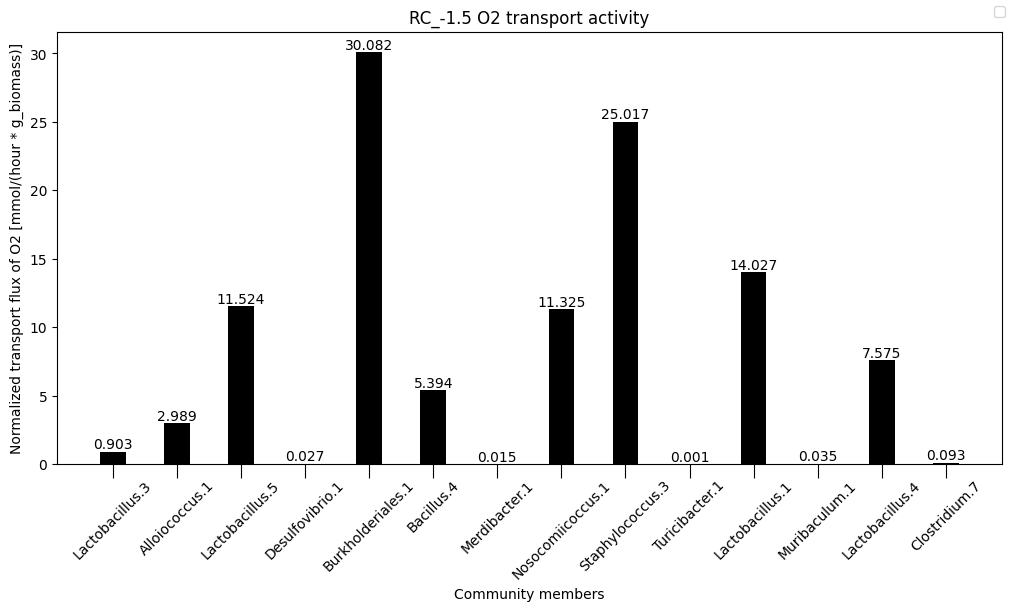

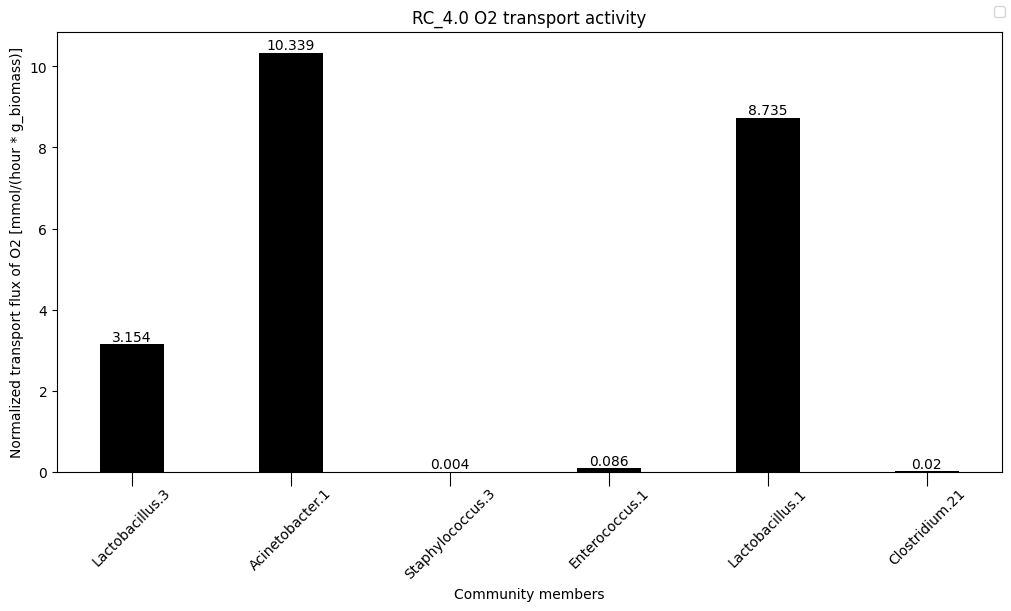

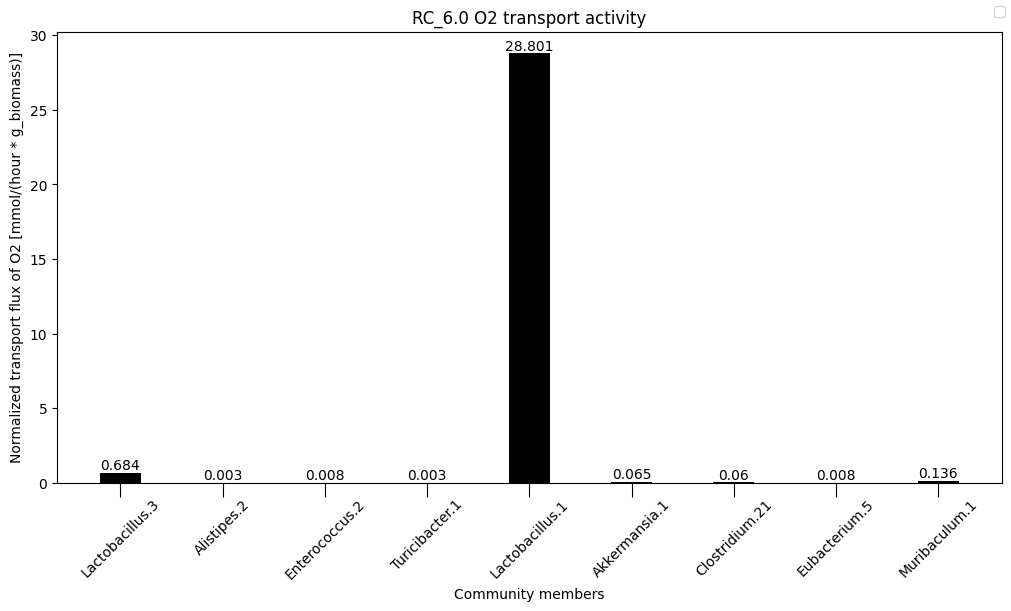

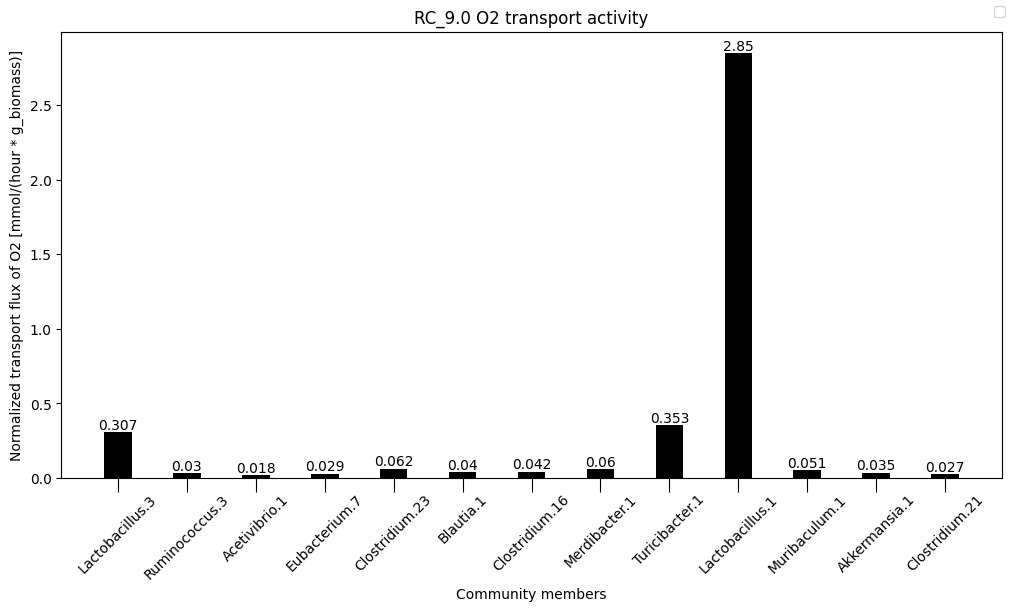

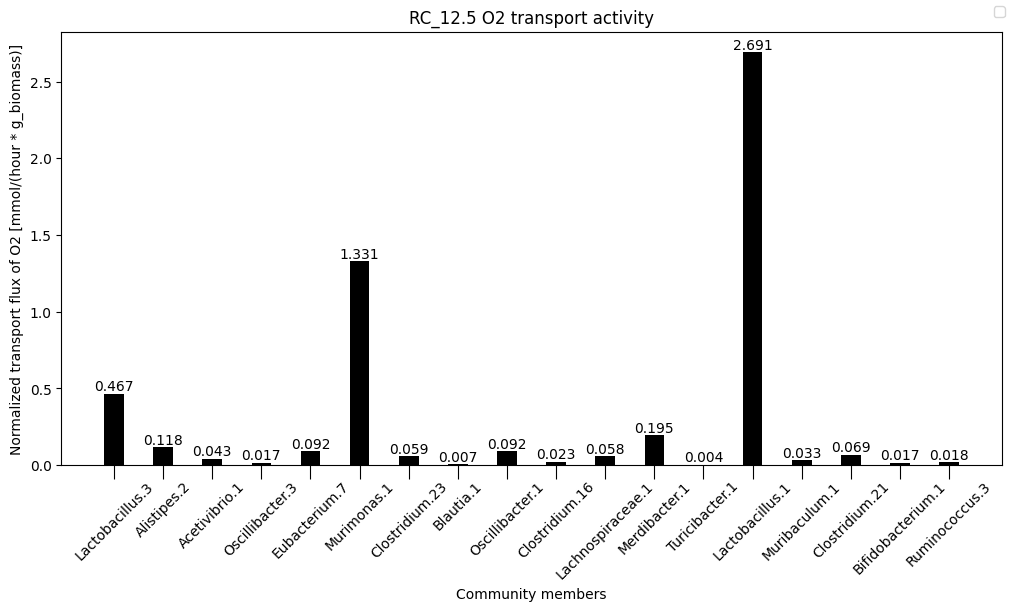

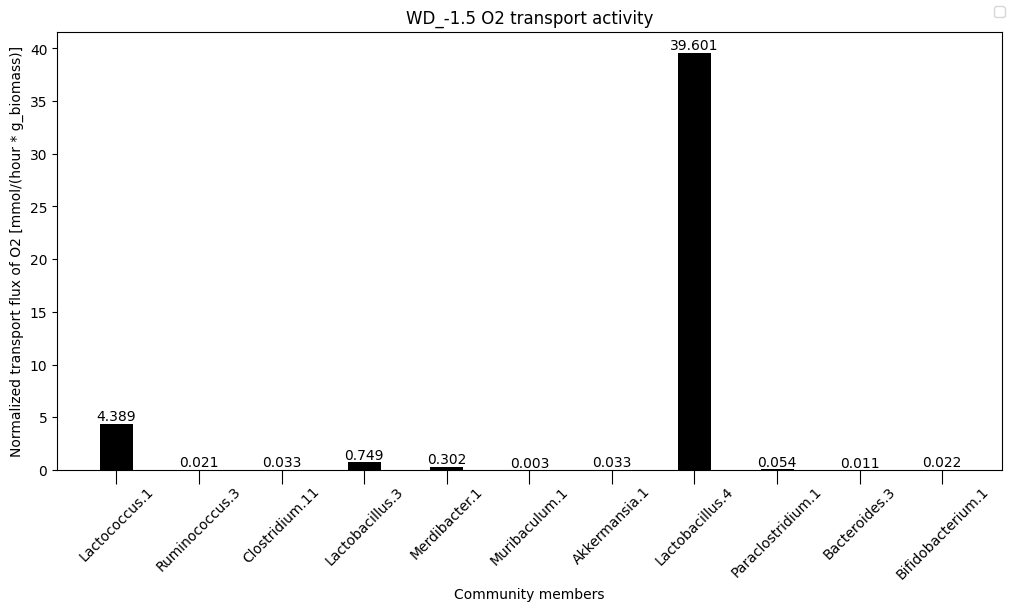

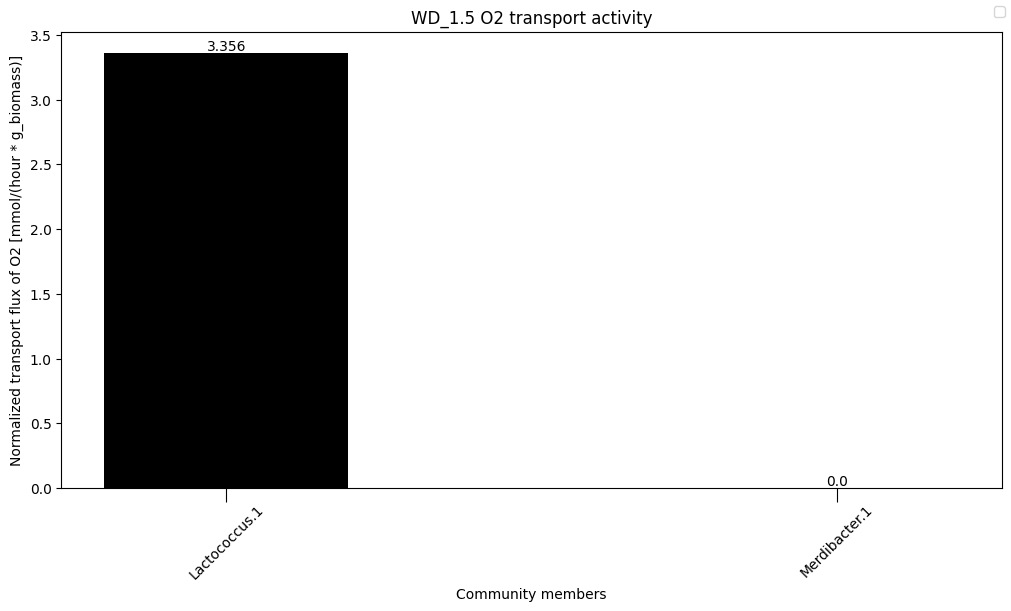

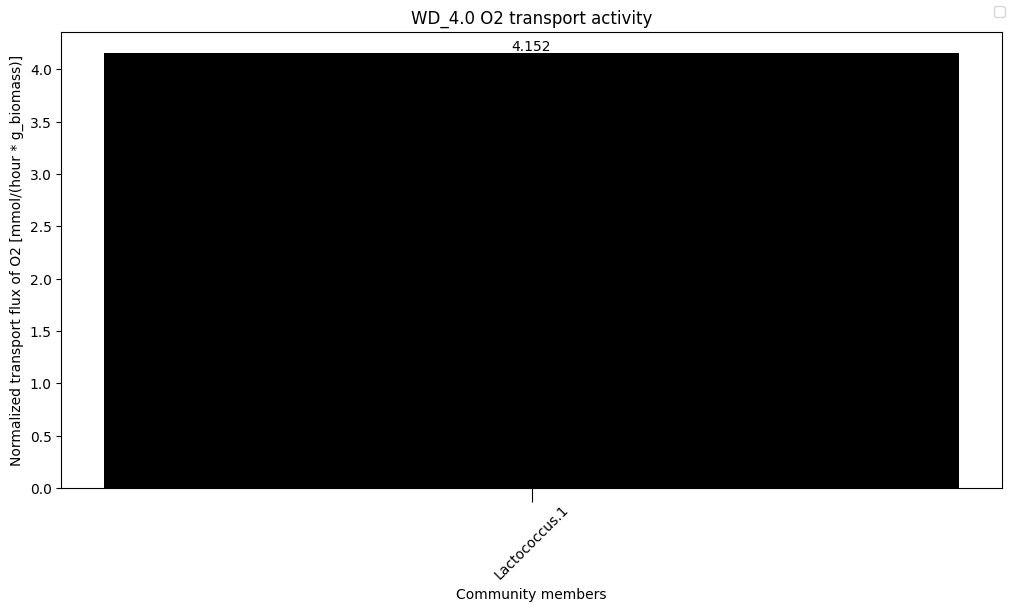

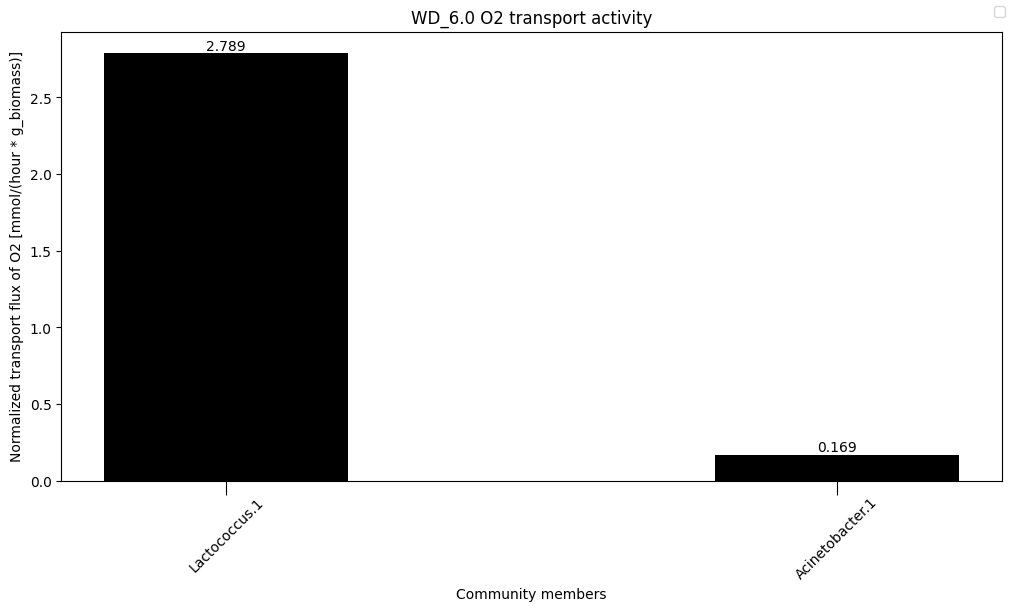

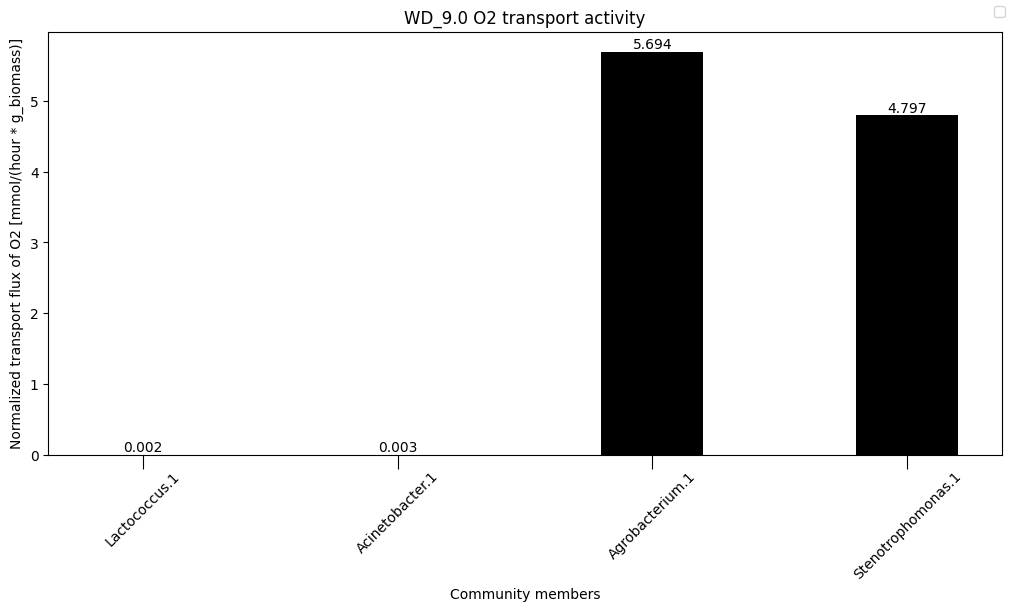

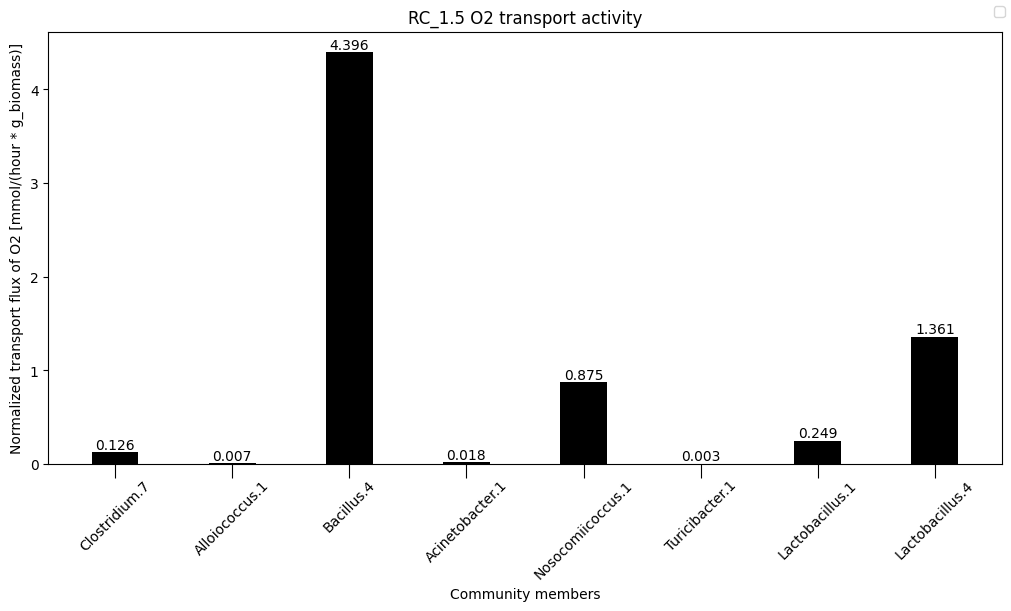

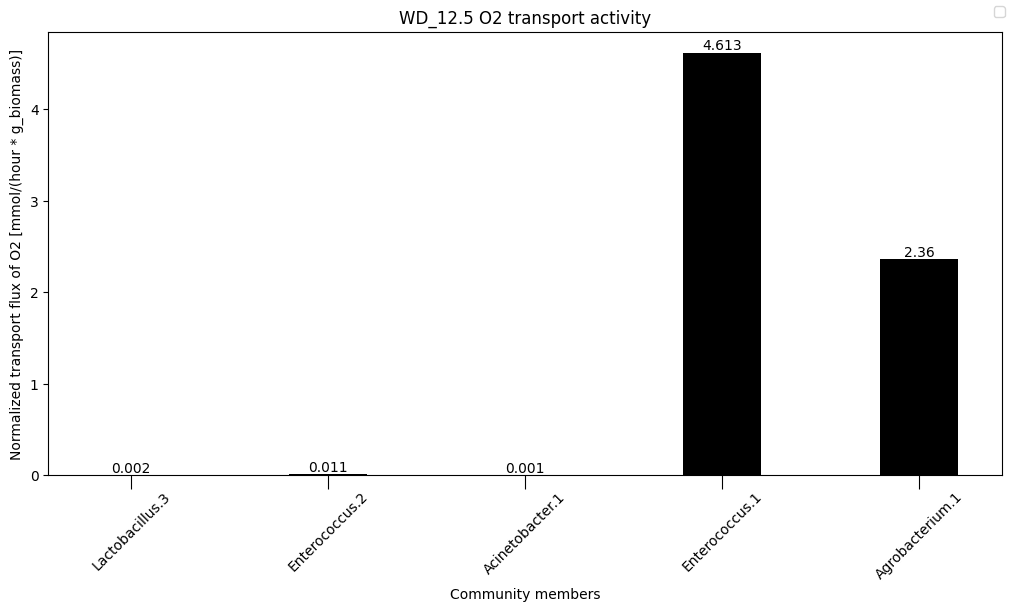

In [754]:
member_o2transport = {}
type_stats = {"flux": {}, "biomass": {}, "exchange": {}}
# for (compartment, diet_day), flux in o2transports.stack().to_dict().items():
for (compartment, diet_day), flux in normalized_o2transports.stack().to_dict().items():
    if flux == 0: continue
    member_o2transport[diet_day] = member_o2transport.get(diet_day, {})
    # print(compartment, diet_day, flux)
    if FBAHelper.isnumber(compartment) and float(compartment) > 0:
        member_o2transport[diet_day][new_comData[diet_day][compartment]["name"]] = flux

display(member_o2transport)
membersO2 = DataFrame(member_o2transport)
display(membersO2)
membersO2.to_csv("memberO2transports.csv")


# visualize the member contributions


def BarChart(member_stats, width=.8, baseDir=None, day_diet = None):
    ## simple carbs
    baseDir = baseDir or getcwd()
    fig, ax = pyplot.subplots(figsize=(10, 6), layout='constrained')
    barss = []
    padding = 1
    numCols = len(member_stats)
    xs = arange(numCols) * (1 + padding)
    # for i, (member, flux) in enumerate(member_stats.items()):
    barss.append(ax.bar(xs + width, list(member_stats.values()), width, color="black"))
    print(f"{len(barss)} bars")
    ### Add text labels above each bar
    for bars in barss:
        for bar in bars:
            val = bar.get_height()
            if val == 0:   continue
            location = "bottom"
            ax.text(bar.get_x() + bar.get_width()/2, val, f'{abs(round(val, 3))}',
                    ha='center', va=location, fontsize=10, color='black')
                
    ## curtail the figure
    fig.legend(loc='upper right', ncols=2)
    categories = list(member_stats.keys())
    ax.set_xticks(xs + width)  # Center the tick labels
    ax.set_xticklabels(categories, rotation=45)
    ax.tick_params(axis='x', length=10, pad=0)  # Increase tick length and reduce padding
    ax.set_xlabel('Community members')
    ax.set_ylabel('Normalized transport flux of O2 [mmol/(hour * g_biomass)]')
    ax.set_title(f"{day_diet} O2 transport activity")
    
    fig.savefig(baseDir+f"/{day_diet}_member_O2_Fit.png")


for diet_day, content in member_o2transport.items():
    BarChart(content, day_diet=diet_day)

In [755]:
# mask for inclusion in the 
boolO2transports = normalized_o2transports > 2
display(boolO2transports)

total_o2_consumer_fluxes = total_member_fluxes[boolO2transports].sum()
total_o2_consumer_fluxes

,RC_-1.5,RC_1.5,RC_4.0,RC_6.0,RC_9.0,RC_12.5,WD_-1.5,WD_1.5,WD_4.0,WD_6.0,WD_9.0,WD_12.5
1,False,False,True,False,False,False,True,True,True,True,False,False
10,True,False,False,False,False,False,False,False,False,False,False,False
11,True,False,False,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,False,False,False,False
13,True,True,False,False,False,False,False,False,False,False,False,False
14,False,False,False,False,False,False,False,False,False,False,False,False
15,True,False,False,False,False,False,False,False,False,False,False,False
16,False,False,False,False,False,False,False,False,False,False,False,False
17,False,False,False,False,False,False,False,False,False,False,False,False
18,False,False,False,False,False,False,False,False,False,False,False,False


RC_-1.5     602.886895
RC_1.5       22.825422
RC_4.0      599.751391
RC_6.0       44.580968
RC_9.0      154.707113
RC_12.5     121.050882
WD_-1.5    1159.402826
WD_1.5     2258.288511
WD_4.0     2219.118619
WD_6.0     2367.424338
WD_9.0       69.444050
WD_12.5     217.454987
dtype: float64

In [362]:
# from pandas import read_csv
# from json import load

# asv_setNames = load(open("asvset_names.json", 'r'))
# asv_sets = load(open("asv_asvset.json", 'r'))

# # taxonomy = read_csv("wd_taxonomy.csv").set_index("Feature ID")
# # taxonomy_dic = taxonomy.T.to_dict()
# abundances = read_csv("mean_abund_perDay_perTreatment_100.csv").set_index("Unnamed: 0")
# newIndex, missedHashes = [], []
# for m in abundances.index:
#     if m not in asv_sets:   missedHashes.append(m)  ;  newIndex.append(m)
#     else:  newIndex.append(asv_setNames[asv_sets[m]])
# abundances.index = newIndex
# print(len(missedHashes), missedHashes)
# definedAbundances = abundances[abundances.index.str.contains("\.")]
# definedAbundances.columns = [col.replace("-ABX", "") for col in definedAbundances.columns]
# print(definedAbundances.columns)
# # display(definedAbundances)

# ## average between adjacent diet+day points for comparison with the predicted values
# RCintervals = [["RC_-3", "RC_0"], ["RC_0", "RC_3"], ["RC_3", "RC_5"], ["RC_5", "RC_7"], ["RC_8", "RC_11"], ["RC_11", "RC_13"]]
# WDintervals = [["WD_-3", "WD_0"], ["WD_0", "WD_3"], ["WD_3", "WD_5"], ["WD_5", "WD_7"], ["WD_8", "WD_11"], ["WD_11", "WD_13"]]
# newCols = []
# for cols in RCintervals:
#     day1, day2 = cols[0].split("_")[-1], cols[1].split("_")[-1]
#     aveDay = (int(day1)+int(day2))/2
#     definedAbundances[f"RC_{aveDay}"] = (definedAbundances[cols[0]] + definedAbundances[cols[1]])/2
#     newCols.append(f"RC_{aveDay}")

# for cols in WDintervals:
#     day1, day2 = cols[0].split("_")[-1], cols[1].split("_")[-1]
#     aveDay = (int(day1)+int(day2))/2
#     definedAbundances[f"WD_{aveDay}"] = (definedAbundances[cols[0]] + definedAbundances[cols[1]])/2
#     newCols.append(f"WD_{aveDay}")

# definedAbundances.drop([col for col in definedAbundances.columns if col not in newCols], axis=1, inplace=True)
# # definedAbundances.drop(["RC_1", "RC_2", "RC_4",], axis=1, inplace=True)

# from collections import Counter
# print()
# print(Counter(definedAbundances.index))
# definedAbundances.index.name = "member"
# print()
# definedAbundances = definedAbundances.groupby(by="member").sum()
# print(Counter(definedAbundances.index))
# abundances_dic = definedAbundances.T.to_dict()
# display(definedAbundances)

22 ['efccbf9af6f53b95d750539be7153a8c', '77ed2d3561c74db8078363fa2496e5c7', '9cf5cb71450a2aa080ff905f89b0a624', 'f74112b56922a99ef89d2cef314854ec', '514e31acd7be571b6d4210099e6dbbf6', '83a4aa4f6ec422145d5f32d8c92363cb', '33a7487cf2e9ba2883f7de82fa0e83ce', 'f13aade0a534cc6ecebc973a4ea5cf7c', '46289e2c7768d63cf3403101a2cd0ce7', '532b1ddadb35f4749e3fda0fdc5cf011', '43e6cf1a618b7effe128690f78ceaaf7', '405f1bbf55c2b8bb861d63d6764a34bb', 'a78e2d94057a51aa4748ef151537d100', '87e1dade449ce7357886fc2a92e2e911', 'a94377659b9c7b34146442586474fb23', 'e117df89368424df0ad58a4fb9543db6', 'af1f95d4540789601ec0460425804d26', 'cc4eb8e929d4eab5b524bbd36739d201', '2e57e1a87de1f5a5888c099a41c2a671', 'e7d8c6c485130e4f986455a508b97c02', '2e13210e10ffc3cf1c56c0f735d38ab5', '641632bf34688ce998689b8ced776227']
Index(['RC_-13', 'RC_-3', 'RC_0', 'RC_1', 'RC_11', 'RC_13', 'RC_2', 'RC_3',
       'RC_4', 'RC_5', 'RC_6', 'RC_7', 'RC_8', 'WD_-13', 'WD_-3', 'WD_0',
       'WD_1', 'WD_11', 'WD_13', 'WD_2', 'WD_3', 'WD_4

/tmp/ipykernel_639261/3207736462.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  definedAbundances[f"RC_{aveDay}"] = (definedAbundances[cols[0]] + definedAbundances[cols[1]])/2
/tmp/ipykernel_639261/3207736462.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  definedAbundances[f"RC_{aveDay}"] = (definedAbundances[cols[0]] + definedAbundances[cols[1]])/2
/tmp/ipykernel_639261/3207736462.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,RC_-1.5,RC_1.5,RC_4.0,RC_6.0,RC_9.5,RC_12.0,WD_-1.5,WD_1.5,WD_4.0,WD_6.0,WD_9.5,WD_12.0
member,,,,,,,,,,,,
Acetivibrio.1,0.002126,0.000147,0.000000,0.000344,0.012348,0.029159,0.000056,0.000000,0.000000,0.000000,0.000000,0.000000
Acinetobacter.1,0.000000,0.042130,0.042237,0.000122,0.000003,0.000000,0.000000,0.000203,0.000302,0.048108,0.182176,0.117081
Agrobacterium.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007963,0.022578,0.014968
Akkermansia.1,0.001558,0.000988,0.000665,0.030194,0.053265,0.027813,0.018419,0.000004,0.000004,0.000169,0.000037,0.000000
Alistipes.1,0.002978,0.000075,0.000000,0.000000,0.000051,0.000051,0.000685,0.000000,0.000000,0.000000,0.000000,0.000000
Alistipes.2,0.000005,0.000000,0.000000,0.012622,0.027038,0.026924,0.000091,0.000000,0.000000,0.000003,0.000000,0.000000
Alistipes.4,0.000009,0.000000,0.000000,0.003803,0.007018,0.001511,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Alloiococcus.1,0.016804,0.018553,0.001896,0.000143,0.000000,0.000029,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Bacillus.4,0.010255,0.010349,0.000104,0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [497]:
# o2rxns_2.columns = [col.split("_")[-1].replace("c", '') for col in o2rxns_2.columns]
# o2rxns_2 = o2rxns_2.groupby(level=0, axis=1).sum()
# display(o2rxns_2)

/tmp/ipykernel_639261/2036993436.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  o2rxns_2 = o2rxns_2.groupby(level=0, axis=1).sum()


,1,10,11,12,13,14,15,16,17,18,19,2,3,4,5,6,7,8,9
WD_-1.5,40.034823,0.001691,0.001611,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.114481,0.000000,4.434659,0.005806,7.117314,2.753666
WD_1.5,56.057468,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.965273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
WD_4.0,55.652671,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
WD_6.0,55.694982,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.812641,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
WD_9.0,42.332743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627021,3.700538,0.604291,0.054648,6.386406,2.302727,0.000000,0.000000
WD_12.5,2.329818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006536,34.515777,17.803428,-1.736176,4.166927,0.000000,0.000000,0.000000
RC_-1.5,0.002914,0.207284,0.000978,1.251245,2.002540,14.050776,3.723531,0.000000,0.000000,0.000000,0.000000,0.012745,24.816902,11.166650,0.001687,0.005305,8.504206,3.557759,15.880246
RC_1.5,3.429908,8.193525,0.003768,14.283881,2.768621,6.245000,0.000000,0.000000,0.000000,0.000000,0.000000,1.399699,0.000000,19.569363,21.098231,0.000000,-1.911598,0.317189,1.104324
RC_4.0,9.115591,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.438191,0.688581,0.290456,0.184873,15.273494,3.038798,0.279109,0.001122
RC_6.0,25.180859,0.000348,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.251529,0.010208,0.003126,0.048844,0.000555,0.007943,0.002355,12.186454


In [498]:
# from json import load

# community_model_data = load(open("community_model_data.json", 'r'))
# # display(community_model_data)

# new_comData = {}
# df_dict = {}
# for day_date, content in community_model_data.items():
#     day_date = day_date.replace("-ABX", '')
#     df_dict[day_date] = {}
#     new_comData[day_date] = {}
#     for index, name in enumerate(content["names"]):
#         new_comData[day_date][str(index+1)] = {"name": name, "abundance": content["abundances"][name]}
#         df_dict[day_date][str(index+1)] = content["abundances"][name]
        
# display(new_comData)

# from pandas import DataFrame
# df = DataFrame(df_dict)
# display(df.T)

{'RC_-1.5': {'1': {'name': 'Lactobacillus.3',
   'abundance': 0.04843895548529505},
  '2': {'name': 'Merdibacter.1', 'abundance': 0.21186061018309485},
  '3': {'name': 'Nosocomiicoccus.1', 'abundance': 0.08786203695767955},
  '4': {'name': 'Staphylococcus.3', 'abundance': 0.1264915649541215},
  '5': {'name': 'Turicibacter.1', 'abundance': 0.028043883563881544},
  '6': {'name': 'Lactobacillus.1', 'abundance': 0.08819119567468148},
  '7': {'name': 'Muribaculum.1', 'abundance': 0.08117072035313463},
  '8': {'name': 'Lactobacillus.4', 'abundance': 0.03467786614577383},
  '9': {'name': 'Clostridium.7', 'abundance': 0.08385539204093137},
  '10': {'name': 'Alloiococcus.1', 'abundance': 0.024959315539621465},
  '11': {'name': 'Lactobacillus.5', 'abundance': 0.016264689349344427},
  '12': {'name': 'Desulfovibrio.1', 'abundance': 0.011508571646387479},
  '13': {'name': 'Burkholderiales.1', 'abundance': 0.0117252922299623},
  '14': {'name': 'Staphylococcus.4', 'abundance': 0.06368399216670433},
 

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
RC_-1.5,0.048439,0.211861,0.087862,0.126492,0.028044,0.088191,0.081171,0.034678,0.083855,0.024959,0.016265,0.011509,0.011725,0.063684,0.015232,NaN,NaN,NaN,NaN
RC_1.5,0.203490,0.084746,0.130975,0.073271,0.131832,0.011186,0.043203,0.083213,0.013824,0.043536,0.021775,0.058852,0.012146,0.049445,0.012640,NaN,NaN,NaN,NaN
RC_4.0,0.522326,0.029689,0.126854,0.045847,0.124910,0.029935,0.040567,0.024672,0.012753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RC_6.0,0.547970,0.016939,0.171295,0.014990,0.023314,0.038705,0.059241,0.012159,0.042053,0.016180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RC_9.0,0.102490,0.154546,0.022876,0.012639,0.112447,0.081845,0.104583,0.092191,0.063788,0.028447,0.021300,0.046797,0.021372,0.015559,0.024142,0.012147,0.012126,0.012981,NaN
RC_12.5,0.024459,0.118718,0.154957,0.064747,0.053553,0.052017,0.089387,0.038403,0.017105,0.050355,0.054535,0.023276,0.053492,0.042715,0.062350,0.010352,0.023710,0.013360,0.019238
WD_-1.5,0.572458,0.017866,0.194700,0.018558,0.021918,0.025256,0.049653,0.019735,0.015559,0.011569,0.013779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WD_1.5,0.977118,0.014562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WD_4.0,0.991019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WD_6.0,0.930318,0.048784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [756]:
# weighted_fluxes = df.T.multiply(o2rxns_2)
# total_o2_metabolism = weighted_fluxes.T.sum()/bulk_total_fluxes
total_o2_metabolism = total_o2_consumer_fluxes/bulk_total_fluxes
# total_o2_metabolism = -o2rxns/bulk_total_fluxes
newDict = {}
for label, percent in total_o2_metabolism.items():
    diet, day = label.split("_")
    newDict[diet] = newDict.get(diet, {})
    newDict[diet][day] = percent
newDict

newDF = DataFrame(newDict)
newDF

,RC,WD
-1.5,0.372910,0.516545
1.5,0.012447,0.951252
4.0,0.437035,0.962655
6.0,0.028643,0.916094
9.0,0.084074,0.034865
12.5,0.066574,0.122397


[ 0  2  4  6  8 10]
2


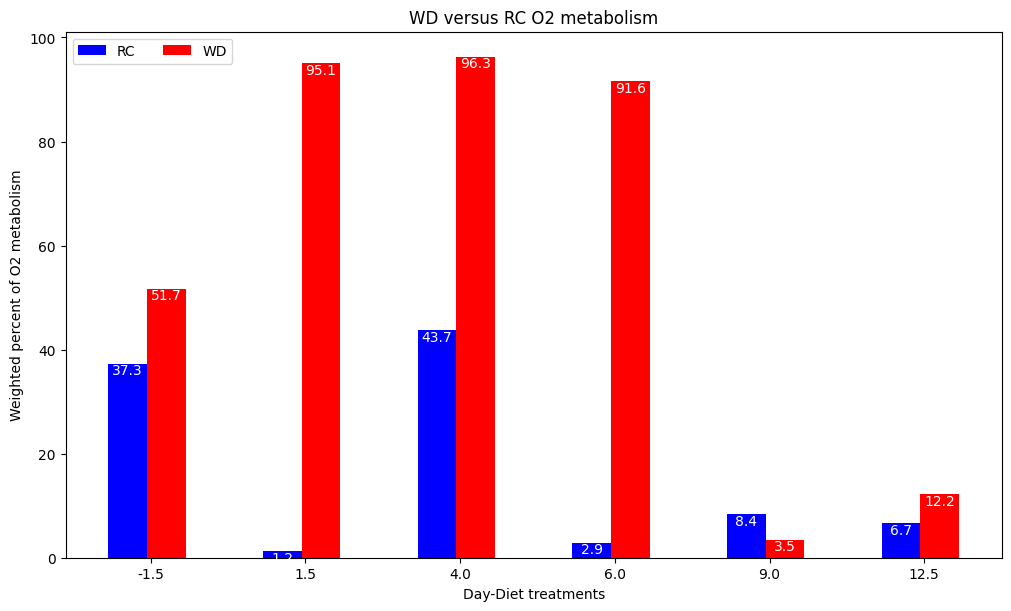

In [757]:
from matplotlib.ticker import MaxNLocator
from matplotlib import pyplot
from numpy import arange
from os import getcwd

# Plotting the diverging bar chart
def layeredBarChart(averages, errors=None, baseDir=None):
    baseDir = baseDir or getcwd()
    
    fig, ax = pyplot.subplots(figsize=(10, 6))
    wd_label, rc_label = False, False
    for label, abundance in averages.items():
        # error = errors[day][diet]
        if diet == "WD":
            color = "black"
            bars = ax.bar([day], [abundance], color="blue", label=diet if not wd_label else "",
                          # yerr=error,
                          bottom=[abundance])
            wd_label = True
        else:
            color = "white"
            bars = ax.bar([day], [abundance], color='red', label=diet if not rc_label else "",
                          # yerr=error,
                          bottom=[0])
            rc_label = True
        for bar in bars:
            ax.text(bar.get_x() + bar.get_width()/1.2, abundance, '%.1f' %(abundance), ha='center', va='bottom', fontsize=10, color=color)
    ax.set_xlabel('days')
    ax.set_ylabel('ave. number of consumption+production per ASV')
    ax.set_title("Average metabolic connectivity")
    ax.legend()
    fig.savefig(baseDir+f"/O2fluxes.png")

    
def BarChart(df, width=.5, baseDir=None):
    ## simple carbs
    baseDir = baseDir or getcwd()
    fig, ax = pyplot.subplots(figsize=(10, 6), layout='constrained')
    colors = {"WD": "red", "RC": "blue"}
    barss = []
    numCols = len(df.index)
    padding = 1
    xs = arange(numCols) * (1 + padding)
    print(xs)
    for i, (row_label, row_data) in enumerate(df.T.iterrows()):
        bars = ax.bar(xs+width*i, round(row_data*100, 1), width, label=row_label, color=colors.get(row_label, 'gray'))
        # print(i, row_label, row_data)
        # bars = ax.bar(xs[i] + width*i, round(row_data*100, 1))
        barss.append(bars)
        # break
    # return
    print(len(barss))
    ### Add text labels above each bar
    for bars in barss:
        for bar in bars:
            val = bar.get_height()
            if val == 0:   continue
            location = "top" if val > 0 else "bottom"
            ax.text(bar.get_x() + bar.get_width()/2, val, f'{abs(val)}', ha='center', va=location, fontsize=10, color='white')
                
                
    ### curtail the figure
    categories = list(df.index)
    ax.set_xticks(xs + width*numCols/10)  # Center the tick labels
    ax.set_xticklabels(categories)
    ax.legend(loc='upper left', ncols=3)
    ax.set_xlabel('Day-Diet treatments')
    ax.set_ylabel('Weighted percent of O2 metabolism')
    ax.set_title(f"WD versus RC O2 metabolism")
    
    fig.savefig(baseDir+f"/O2_barChart_Fit.png")
    
BarChart(newDF)
# layeredBarChart(total_o2_metabolism)

In [98]:
# fluxes = read_csv("ASVFluxes2.csv").set_index("id")
# # display(fluxes)
# oxygenRXNs = fluxes[fluxes["equation"].str.contains("cpd00007")]
# bulk_total_asvfluxes = fluxes.drop(["equation", "name"], axis=1).sum()
# oxygenRXNs

,equation,name,Lactobacillus.3_RC_-1.5,Lactobacillus.3_RC_1.5,Lactobacillus.3_RC_4,Lactobacillus.3_RC_6,Lactobacillus.3_RC_9,Lactobacillus.3_RC_12.5,Lactobacillus.3_WD_-1.5,Lactobacillus.3_WD_9,...,Merdibacter.1_RC_4,Merdibacter.1_RC_9,Merdibacter.1_RC_12.5,Merdibacter.1_WD_-1.5,Merdibacter.1_WD_1.5,Enterococcus.3_RC_1.5,Enterococcus.3_RC_4,Enterococcus.3_RC_6,Enterococcus.3_RC_9,Oscillibacter.3_RC_12.5
id,,,,,,,,,,,,,,,,,,,,,
rxn00262,rxn00262_c1: cpd00001_c1 + cpd00007_c1 + cpd00...,L-Aspartic acid:oxygen oxidoreductase (deamina...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rxn00152,rxn00152_c1: cpd00007_c1 + cpd00009_c1 + cpd00...,Pyruvate:oxygen 2-oxidoreductase (phosphorylat...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
rxn00208,rxn00208_c1: cpd00001_c1 + cpd00007_c1 + cpd00...,Pyridoxamine-5'-phosphate:oxygen oxidoreductas...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
rxn00614,rxn00614_c1: cpd00007_c1 + cpd00080_c1 --> cpd...,sn-Glycerol-3-phosphate:oxygen 2-oxidoreductas...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
rxn00264,rxn00264_c1: cpd00007_c1 + cpd00130_c1 --> cpd...,(S)-Malate:oxygen oxidoreductase [c0],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rxn00058,rxn00058_c19: cpd00007_c19 + 4 cpd00067_c19 + ...,Ferrocytochrome-c:oxygen oxidoreductase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rxn01350,rxn01350_c7: cpd00001_c7 + cpd00007_c7 + cpd00...,Methanethiol:oxygen oxidoreductase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rxn01778,rxn01778_c11: cpd00001_c11 + cpd00007_c11 + cp...,D-Ornithine:oxygen oxidoreductase (deaminating),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
bulk_total_asvfluxes[bulk_total_asvfluxes < 0]

Lactobacillus.1_RC_-1.5     -149.642380
Lactobacillus.1_RC_1.5      -111.491040
Lactobacillus.1_RC_4         -22.337367
Lactobacillus.1_RC_6        -150.636891
Lactobacillus.1_RC_9         -49.362052
Lactobacillus.1_RC_12.5     -162.685804
Alloiococcus.1_RC_-1.5       -35.995850
Alloiococcus.1_RC_1.5        -23.990237
Staphylococcus.4_RC_-1.5    -125.578443
Enterococcus.2_RC_1.5        -80.315787
Enterococcus.2_RC_4          -29.116497
Enterococcus.2_RC_6          -17.297113
Enterococcus.2_RC_9           -1.924180
Enterococcus.2_WD_9          -81.275822
Acinetobacter.1_RC_1.5       -57.238959
Alistipes.2_RC_6             -89.101539
Alistipes.2_RC_9             -66.637905
Alistipes.2_RC_12.5          -38.255245
Bifidobacterium.1_RC_9        -8.650068
Ruminococcus.3_RC_9         -116.129912
Ruminococcus.3_WD_-1.5       -28.807380
Acetivibrio.1_RC_9           -82.776188
Acetivibrio.1_RC_12.5        -79.374340
Eubacterium.7_RC_9          -138.721373
Eubacterium.7_RC_12.5        -99.750354


In [59]:
# from modelseedpy.biochem import from_local

# msdb = from_local("../../ModelSEEDDatabase")

In [335]:
# o2consuming, o2producing = [], []
# for rxnID in oxygenRXNs.index:
#     rxn = msdb.reactions.get_by_id(rxnID)
#     if "cpd00007_0" in [m.id for m in rxn.reactants]:
#         o2consuming.append(rxnID)
#     elif "cpd00007_0" in [m.id for m in rxn.products]:   o2producing.append(rxnID)
    
# o2consumingFluxes = oxygenRXNs.loc[o2consuming]
# o2producingFluxes = oxygenRXNs.loc[o2producing]

In [352]:
# total_o2consumption = o2consumingFluxes.sum().drop(["equation", "name"])
# total_o2production = o2producingFluxes.sum().drop(["equation", "name"])
# # total_o2production
# net_o2consumption = (total_o2consumption-total_o2production)#/bulk_total_asvfluxes

In [353]:
# net_o2consumption

Lactobacillus.3_RC_-1.5            0.0
Lactobacillus.3_RC_1.5             0.0
Lactobacillus.3_RC_4          1.369464
Lactobacillus.3_RC_6          2.982747
Lactobacillus.3_RC_9         15.104084
Lactobacillus.3_RC_12.5            0.0
Lactobacillus.3_WD_-1.5            0.0
Lactobacillus.3_WD_9               0.0
Lactobacillus.3_WD_12.5            0.0
Nosocomiicoccus.1_RC_-1.5    22.276006
Nosocomiicoccus.1_RC_1.5      21.07936
Staphylococcus.3_RC_-1.5     20.906919
Staphylococcus.3_RC_1.5      20.667329
Staphylococcus.3_RC_4        39.574693
Turicibacter.1_RC_-1.5             0.0
Turicibacter.1_RC_1.5              0.0
Turicibacter.1_RC_6               -0.0
Turicibacter.1_RC_9               -0.0
Turicibacter.1_RC_12.5            -0.0
Lactobacillus.1_RC_-1.5            0.0
Lactobacillus.1_RC_1.5            -0.0
Lactobacillus.1_RC_4          0.006948
Lactobacillus.1_RC_6          0.007056
Lactobacillus.1_RC_9           0.00353
Lactobacillus.1_RC_12.5       0.003441
Muribaculum.1_RC_-1.5    

In [359]:
# tracking = {"-1.5_RC":{}, "-1.5_WD":{}, "1.5_RC": {}, "1.5_WD":{}, "4_RC": {}, "4_WD": {},
#             "6_RC":{}, "6_WD":{}, "9_RC": {}, "9_WD":{}, "12.5_RC": {}, "12.5_WD": {}}

# for source, flux in net_o2consumption.items():
#     member, diet, day = source.split("_")
#     tracking[day+"_"+diet][member] = flux
    
# # for day, content in tracking.items():
# #     for diet, content2 in content.items():
#         # print(day, diet, sum(list(content2.values())))

# netO2df = DataFrame(tracking)
# netO2df
# # print("\n\n\n")
# # display(tracking)

,-1.5_RC,-1.5_WD,1.5_RC,1.5_WD,4_RC,4_WD,6_RC,6_WD,9_RC,9_WD,12.5_RC,12.5_WD
Lactobacillus.3,0.000000,0.000000e+00,2.220446e-16,NaN,1.369464,NaN,2.982747e+00,NaN,1.510408e+01,0.000000,0.000000e+00,0.000000
Nosocomiicoccus.1,22.276006,NaN,2.107936e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Staphylococcus.3,20.906919,NaN,2.066733e+01,NaN,39.574693,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Turicibacter.1,0.000000,NaN,0.000000e+00,NaN,NaN,NaN,-9.714451e-17,NaN,-1.734723e-18,NaN,-1.006140e-16,NaN
Lactobacillus.1,0.000000,NaN,-1.110223e-16,NaN,0.006948,NaN,7.056372e-03,NaN,3.530328e-03,NaN,3.441033e-03,NaN
Muribaculum.1,8.268979,1.324813e+01,NaN,NaN,NaN,NaN,2.098395e+01,NaN,2.138940e+01,NaN,2.267493e+01,NaN
Lactobacillus.4,8.094256,1.386116e+01,6.306185e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Clostridium.7,14.944993,NaN,1.485703e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alloiococcus.1,0.641356,NaN,-3.469447e-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lactobacillus.5,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### visualizing the relative oxygen consumption

In [ ]:
# from matplotlib import pyplot
# fig, ax = pyplot.subplots(figsize=(10, 6), layout='constrained')
# colors = {"RC": "blue", "WD":"red"}
# barss = []
# numCols = len(InteractionCounts.columns)
# padding = 1
# xs = arange(numCols) * (1 + padding)
# # for i, category in enumerate(InteractionCounts.columns):
# for i, (row_label, row_data) in enumerate(InteractionCounts.iterrows()):
# # for i, (sample, ele) in enumerate(colors.items()):
#     bars = ax.bar(xs + width*i, row_data, width, label=row_label, color=colors.get(row_label, 'gray'))
#     # ax.bar_label(bars, padding=3)
#     # bars = ax.bar(xs[i] - width*displacements[i], ele, width, label=index)  # InteractionCounts['Positive'], 
#     barss.append(bars)

#     ### Add text labels above each bar
#     for bars in barss:
#         for bar in bars:
#             val = bar.get_height()
#             if val == 0:   continue
#             ax.text(bar.get_x() + bar.get_width() / 2, val, f'{abs(val)}', ha='center', va='top', fontsize=10, color='white')


# ### curtail the figure
# # ax.yaxis.set_major_locator(MaxNLocator(integer=True))
# # for label in ax.get_xticklabels():
# #     label.set_y(label.get_position()[1] - 0.02)  # Adjust the y position of the tick labels
# categories = list(InteractionCounts.columns)
# ax.set_xticks(xs + width*numCols/5)  # Center the tick labels
# ax.set_xticklabels(categories)
# ax.legend(loc='upper left', ncols=3)
# ax.set_xlabel('Categories')
# ax.set_ylabel('number of exchanges')
# ax.set_title(f"{' + '.join(categories)} syntrophy count")

# fig.savefig(baseDir+f"/diverging_barChart.png")

## bar chart with the growth, and total intra- and extra-cellular fluxes of all members

### Perhaps a large column for each day interval and then subcolumns for each member

In [743]:
# from pandas import read_csv
# # total_member_fluxes = abs(read_csv("total_community_solutions.csv").set_index("id"))
# from json import load
# fluxesJSON = load(open("CommunityFluxSolution-NoFit.json", 'r'))

# # fluxesJSON

# total_member_fluxes = DataFrame(fluxesJSON)
# total_member_fluxes.columns = [x.replace("-ABX", '') for x in fluxes.columns]

# # total_member_fluxes = abs(read_csv(".csv").set_index("id"))
# # display(total_fluxes.head(20))
# total_member_fluxes.drop(["max_growth", "carbon_uptake",
#                           # "flux fitting objective",
#                           "minimum probability objective"], axis=0, inplace=True)
# total_member_fluxes.index = [i.split("_")[-1].replace("c", '') for i in total_member_fluxes.index]
# total_member_fluxes.index.name = "compartment"
# total_member_fluxes = total_member_fluxes.groupby("compartment", axis=0).sum()
# total_member_fluxes_dic = total_member_fluxes.to_dict()
# total_member_fluxes

/tmp/ipykernel_639261/1463529861.py:18: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  total_member_fluxes = total_member_fluxes.groupby("compartment", axis=0).sum()


,RC_-1.5,RC_1.5,RC_4.0,RC_6.0,RC_9.0,RC_12.5,WD_-1.5,WD_1.5,WD_4.0,WD_6.0,WD_9.0,WD_12.5
compartment,,,,,,,,,,,,
0,2.430753,2.440861,2.426306,2.403893,2.374841,2.409872,3.471814,3.051006,2.957012,3.316653,3.395616,3.435357
1,14.363884,57.812078,150.552519,158.512441,32.695737,9.106077,144.349874,20.198035,27.244177,6.799381,7.033584,16.586215
10,2.958465,-7.175494,0.000000,-5.553473,-3.505689,-10.715392,-2.594645,0.000000,0.000000,0.000000,0.000000,0.000000
11,4.922449,1.180861,0.000000,0.000000,-3.564054,-11.712395,-5.435011,0.000000,0.000000,0.000000,0.000000,0.000000
12,3.356514,21.022082,0.000000,0.000000,-12.882530,10.908398,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
13,6.796381,5.392219,0.000000,0.000000,-4.310938,-11.830031,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14,30.146317,25.300077,0.000000,0.000000,-3.173655,-10.247044,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
15,10.860916,1.429661,0.000000,0.000000,0.666468,0.292713,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
16,0.000000,0.000000,0.000000,0.000000,-0.730476,-3.073926,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [758]:
from json import load

community_model_data = load(open("community_model_data.json", 'r'))
# display(community_model_data)

new_comData = {}
for day_date, content in community_model_data.items():
    day_date = day_date.replace("-ABX", '')
    new_comData[day_date] = {}
    for index, name in enumerate(content["names"]):
        new_comData[day_date][str(index+1)] = {"name": name, "abundance": content["abundances"][name]}
        
display(new_comData)


{'RC_-1.5': {'1': {'name': 'Lactobacillus.3',
   'abundance': 0.04843895548529505},
  '2': {'name': 'Merdibacter.1', 'abundance': 0.21186061018309485},
  '3': {'name': 'Nosocomiicoccus.1', 'abundance': 0.08786203695767955},
  '4': {'name': 'Staphylococcus.3', 'abundance': 0.1264915649541215},
  '5': {'name': 'Turicibacter.1', 'abundance': 0.028043883563881544},
  '6': {'name': 'Lactobacillus.1', 'abundance': 0.08819119567468148},
  '7': {'name': 'Muribaculum.1', 'abundance': 0.08117072035313463},
  '8': {'name': 'Lactobacillus.4', 'abundance': 0.03467786614577383},
  '9': {'name': 'Clostridium.7', 'abundance': 0.08385539204093137},
  '10': {'name': 'Alloiococcus.1', 'abundance': 0.024959315539621465},
  '11': {'name': 'Lactobacillus.5', 'abundance': 0.016264689349344427},
  '12': {'name': 'Desulfovibrio.1', 'abundance': 0.011508571646387479},
  '13': {'name': 'Burkholderiales.1', 'abundance': 0.0117252922299623},
  '14': {'name': 'Staphylococcus.4', 'abundance': 0.06368399216670433},
 

In [759]:
from modelseedpy.core.fbahelper import FBAHelper

sample_member_stats = {}
type_stats = {"flux": {}, "biomass": {}, "exchange": {}}
for (compartment, diet_day), flux in total_member_fluxes.stack().to_dict().items():
    if flux == 0: continue
    sample_member_stats[diet_day] = sample_member_stats.get(diet_day, {"flux": {}, "biomass": {}})
    # print(compartment, diet_day, flux)
    type_stats["flux"][diet_day] = type_stats["flux"].get(diet_day, {})
    type_stats["biomass"][diet_day] = type_stats["biomass"].get(diet_day, {})
    if FBAHelper.isnumber(compartment) and float(compartment) > 0:
        sample_member_stats[diet_day]["flux"][new_comData[diet_day][compartment]["name"]] = flux
        sample_member_stats[diet_day]["biomass"][new_comData[diet_day][compartment]["name"]
                                                ] = total_fluxes_dic[diet_day][f"bio{int(compartment)+1}"]
        
        type_stats["flux"][diet_day][new_comData[diet_day][compartment]["name"]] = flux
        type_stats["biomass"][diet_day][new_comData[diet_day][compartment]["name"]
                                       ] = total_fluxes_dic[diet_day][f"bio{int(compartment)+1}"]
    
    ## add community and total growth
    # elif compartment == "e0":
    #     sample_member_stats[diet_day]["flux"]["community"] = flux
    #     sample_member_stats[diet_day]["biomass"]["community"] = total_fluxes_dic[diet_day]["bio1"]
    #     type_stats["exchange"][diet_day] = flux
    
display(sample_member_stats)
display(type_stats)

{'RC_-1.5': {'flux': {'Lactobacillus.3': 81.32220307373666,
   'Alloiococcus.1': 27.334938320745326,
   'Lactobacillus.5': 24.539843796083876,
   'Desulfovibrio.1': 22.464281993324253,
   'Burkholderiales.1': 21.462149380004362,
   'Staphylococcus.4': 124.3086633555056,
   'Bacillus.4': 27.300995031818132,
   'Merdibacter.1': 413.5436296236403,
   'Nosocomiicoccus.1': 101.95178607789352,
   'Staphylococcus.3': 189.25128580832194,
   'Turicibacter.1': 54.740564504782604,
   'Lactobacillus.1': 172.14576663702374,
   'Muribaculum.1': 129.0560551224262,
   'Lactobacillus.4': 38.90012967242748,
   'Clostridium.7': 87.08244657661835},
  'biomass': {'Lactobacillus.3': 0.1260679302254753,
   'Alloiococcus.1': 0.0649594777261422,
   'Lactobacillus.5': 0.0423307171157862,
   'Desulfovibrio.1': 0.0299523759910989,
   'Burkholderiales.1': 0.0305164161347149,
   'Staphylococcus.4': 0.165744884474007,
   'Bacillus.4': 0.0396423307481211,
   'Merdibacter.1': 0.5513915061648514,
   'Nosocomiicoccus.1'

{'flux': {'RC_-1.5': {'Lactobacillus.3': 81.32220307373666,
   'Alloiococcus.1': 27.334938320745326,
   'Lactobacillus.5': 24.539843796083876,
   'Desulfovibrio.1': 22.464281993324253,
   'Burkholderiales.1': 21.462149380004362,
   'Staphylococcus.4': 124.3086633555056,
   'Bacillus.4': 27.300995031818132,
   'Merdibacter.1': 413.5436296236403,
   'Nosocomiicoccus.1': 101.95178607789352,
   'Staphylococcus.3': 189.25128580832194,
   'Turicibacter.1': 54.740564504782604,
   'Lactobacillus.1': 172.14576663702374,
   'Muribaculum.1': 129.0560551224262,
   'Lactobacillus.4': 38.90012967242748,
   'Clostridium.7': 87.08244657661835},
  'RC_1.5': {'Lactobacillus.3': 382.4095723904942,
   'Clostridium.7': 47.27060035509013,
   'Alloiococcus.1': 23.233709837220054,
   'Staphylococcus.4': 110.597070066285,
   'Bacillus.4': 22.825421830416886,
   'Acinetobacter.1': 92.92062608282131,
   'Enterococcus.3': 21.312024313965306,
   'Merdibacter.1': 159.2601553580651,
   'Enterococcus.2': 246.13495261

flux {'Lactococcus.1': 1090.973779541777, 'Ruminococcus.3': 27.87310866854522, 'Clostridium.11': 37.333952274114026, 'Lactobacillus.3': 48.405326889450386, 'Merdibacter.1': 527.5180808374423, 'Muribaculum.1': 50.27970281821845, 'Akkermansia.1': 59.38513408312722, 'Lactobacillus.4': 68.42904618828626, 'Paraclostridium.1': 123.64707775951776, 'Bacteroides.3': 53.46982442000461, 'Bifidobacterium.1': 42.154932960226915}
biomass {'Lactococcus.1': 1.6200747636859425, 'Ruminococcus.3': 0.0327406483389714, 'Clostridium.11': 0.038996357503421, 'Lactobacillus.3': 0.0505607179918045, 'Merdibacter.1': 0.5510073918458116, 'Muribaculum.1': 0.0525185560818458, 'Akkermansia.1': 0.0620294337468235, 'Lactobacillus.4': 0.0714760529285496, 'Paraclostridium.1': 0.1405183181522836, 'Bacteroides.3': 0.0558507273330769, 'Bifidobacterium.1': 0.0440320066887096}
1 bars
flux {'Lactobacillus.3': 81.32220307373666, 'Alloiococcus.1': 27.334938320745326, 'Lactobacillus.5': 24.539843796083876, 'Desulfovibrio.1': 22.4

/home/afreiburger/env_packages/lib/python3.11/site-packages/sigfig/sigfig.py:586: UserWarning: warning: 2 significant figures requested from number with only 1 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))


flux {'Lactococcus.1': 2258.288511125523, 'Merdibacter.1': 33.65607078789176}
biomass {'Lactococcus.1': 3.0124892464420365, 'Merdibacter.1': 0.0448961905560438}
1 bars
flux {'Lactobacillus.3': 382.4095723904942, 'Clostridium.7': 47.27060035509013, 'Alloiococcus.1': 23.233709837220054, 'Staphylococcus.4': 110.597070066285, 'Bacillus.4': 22.825421830416886, 'Acinetobacter.1': 92.92062608282131, 'Enterococcus.3': 21.312024313965306, 'Merdibacter.1': 159.2601553580651, 'Enterococcus.2': 246.1349526189484, 'Nosocomiicoccus.1': 130.7195466980372, 'Staphylococcus.3': 237.1133814721748, 'Turicibacter.1': 21.020711852943087, 'Enterococcus.1': 81.18934293985386, 'Lactobacillus.1': 156.37827537201224, 'Lactobacillus.4': 25.979107020542884}
biomass {'Lactobacillus.3': 0.5098794298539879, 'Clostridium.7': 0.1090867617818554, 'Alloiococcus.1': 0.0545602998608711, 'Staphylococcus.4': 0.1474627600883776, 'Bacillus.4': 0.0304338957738887, 'Acinetobacter.1': 0.1238941681104267, 'Enterococcus.3': 0.03167

/home/afreiburger/env_packages/lib/python3.11/site-packages/sigfig/sigfig.py:586: UserWarning: warning: 2 significant figures requested from number with only 1 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))


flux {'Lactococcus.1': 2219.1186187004805}
biomass {'Lactococcus.1': 2.9588248249339744}
1 bars
flux {'Lactobacillus.3': 465.7370223492515, 'Merdibacter.1': 56.42005082875091, 'Enterococcus.2': 241.07282266052735, 'Acinetobacter.1': 87.1282717577143, 'Enterococcus.3': 234.952414134669, 'Staphylococcus.3': 56.88797358265033, 'Enterococcus.1': 77.09291941697319, 'Lactobacillus.1': 46.886096953818566, 'Clostridium.21': 24.236500342254136}
biomass {'Lactobacillus.3': 1.323501070949605, 'Merdibacter.1': 0.0752267344383346, 'Enterococcus.2': 0.3214304302140366, 'Acinetobacter.1': 0.1161710290102862, 'Enterococcus.3': 0.3165049595723306, 'Staphylococcus.3': 0.0758506314435337, 'Enterococcus.1': 0.1027905592226303, 'Lactobacillus.1': 0.0625147959384248, 'Clostridium.21': 0.0323153337896721}
1 bars


/home/afreiburger/env_packages/lib/python3.11/site-packages/sigfig/sigfig.py:586: UserWarning: warning: 2 significant figures requested from number with only 1 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))


flux {'Lactococcus.1': 2367.4243380569987, 'Acinetobacter.1': 124.14354365111308}
biomass {'Lactococcus.1': 3.156565784076, 'Acinetobacter.1': 0.1655247248681511}
1 bars
flux {'Lactobacillus.3': 738.2493948980633, 'Alistipes.2': 28.53650308214634, 'Enterococcus.2': 32.39124125851706, 'Enterococcus.3': 327.5520972402353, 'Turicibacter.1': 28.664028770438406, 'Lactobacillus.1': 44.58096796153074, 'Akkermansia.1': 49.52418047285917, 'Clostridium.21': 113.28134777117819, 'Eubacterium.5': 23.250974942950215, 'Muribaculum.1': 72.53642334346296}
biomass {'Lactobacillus.3': 1.3971083192101297, 'Alistipes.2': 0.0412538611741457, 'Enterococcus.2': 0.0431883216780234, 'Enterococcus.3': 0.4367361296536551, 'Turicibacter.1': 0.0382187050272517, 'Lactobacillus.1': 0.0594412906153756, 'Akkermansia.1': 0.0986835169208812, 'Clostridium.21': 0.1510417970282405, 'Eubacterium.5': 0.031001299923934, 'Muribaculum.1': 0.1072195572308466}
1 bars
flux {'Lactococcus.1': 757.180216637304, 'Lactobacillus.3': 55.9

/home/afreiburger/env_packages/lib/python3.11/site-packages/sigfig/sigfig.py:586: UserWarning: warning: 2 significant figures requested from number with only 1 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))


flux {'Lactobacillus.3': 45.72837729961939, 'Alistipes.2': 94.1449722259526, 'Acetivibrio.1': 63.737521690954544, 'Oscillibacter.3': 43.516114528499834, 'Eubacterium.7': 94.08028169733466, 'Murimonas.1': 79.85971092620132, 'Clostridium.23': 114.16056568289356, 'Blautia.1': 19.35340006307217, 'Oscillibacter.1': 44.32932849537383, 'Clostridium.16': 20.664559698945524, 'Lachnospiraceae.1': 23.952636842347463, 'Merdibacter.1': 221.9569058237188, 'Turicibacter.1': 289.7099526271022, 'Lactobacillus.1': 121.05088189780044, 'Muribaculum.1': 100.1224159609124, 'Akkermansia.1': 97.25093597742496, 'Clostridium.21': 167.11946946797374, 'Bifidobacterium.1': 71.79925575543136, 'Ruminococcus.3': 24.58581681125519}
biomass {'Lactobacillus.3': 0.060971169732827, 'Alistipes.2': 0.1255266296346059, 'Acetivibrio.1': 0.1359444946109307, 'Oscillibacter.3': 0.0580214860380007, 'Eubacterium.7': 0.1333457028214023, 'Murimonas.1': 0.1064796145682708, 'Clostridium.23': 0.1554272509083386, 'Blautia.1': 0.02580453

/home/afreiburger/env_packages/lib/python3.11/site-packages/sigfig/sigfig.py:586: UserWarning: warning: 2 significant figures requested from number with only 1 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))


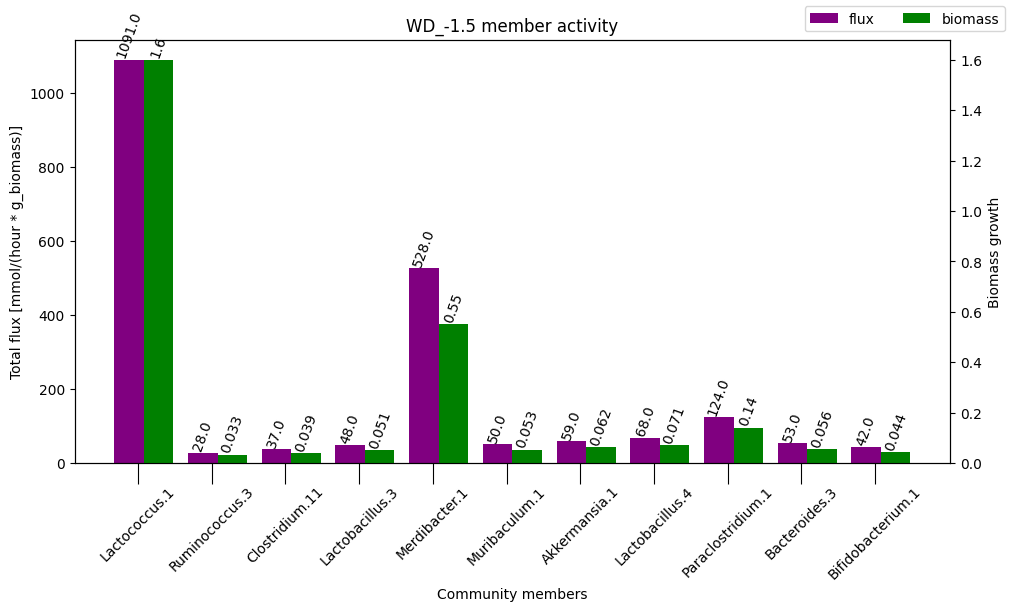

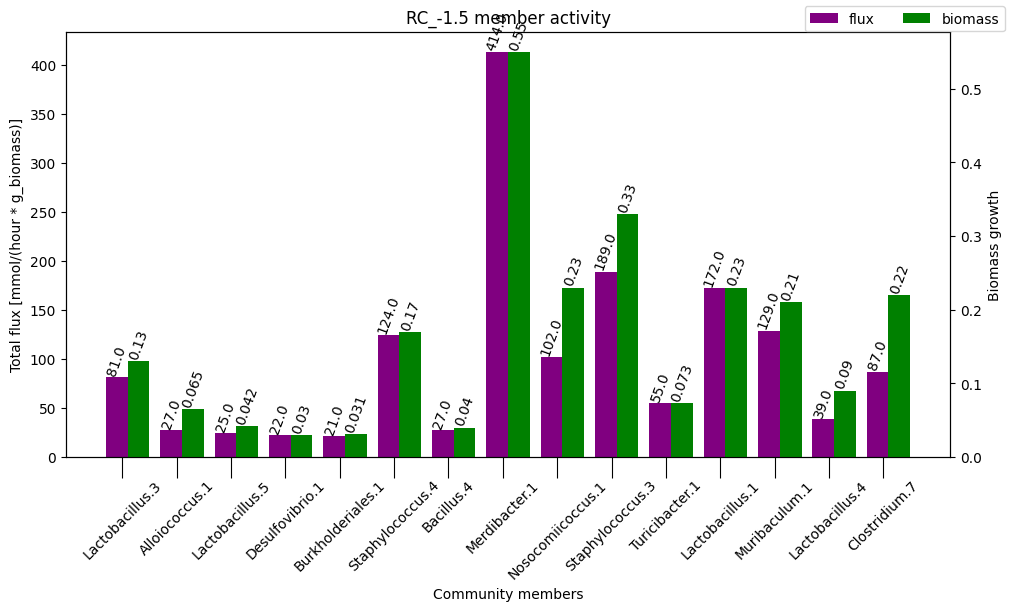

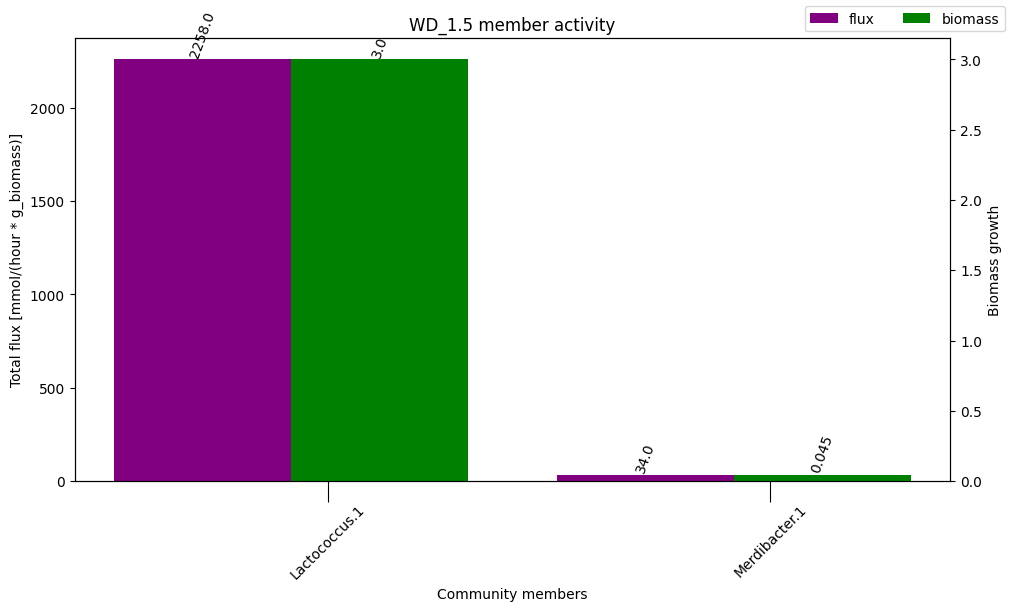

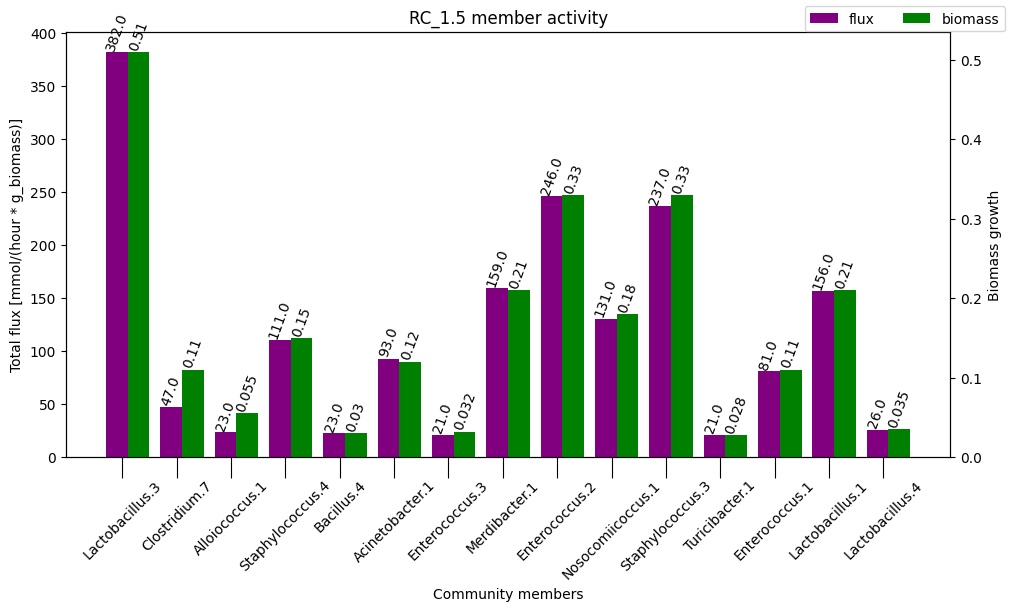

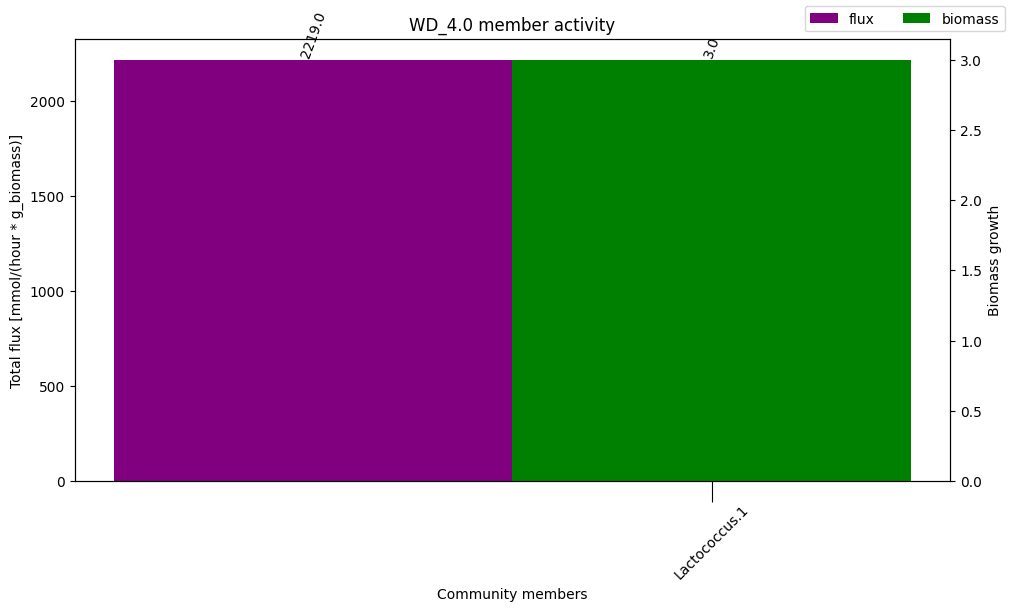

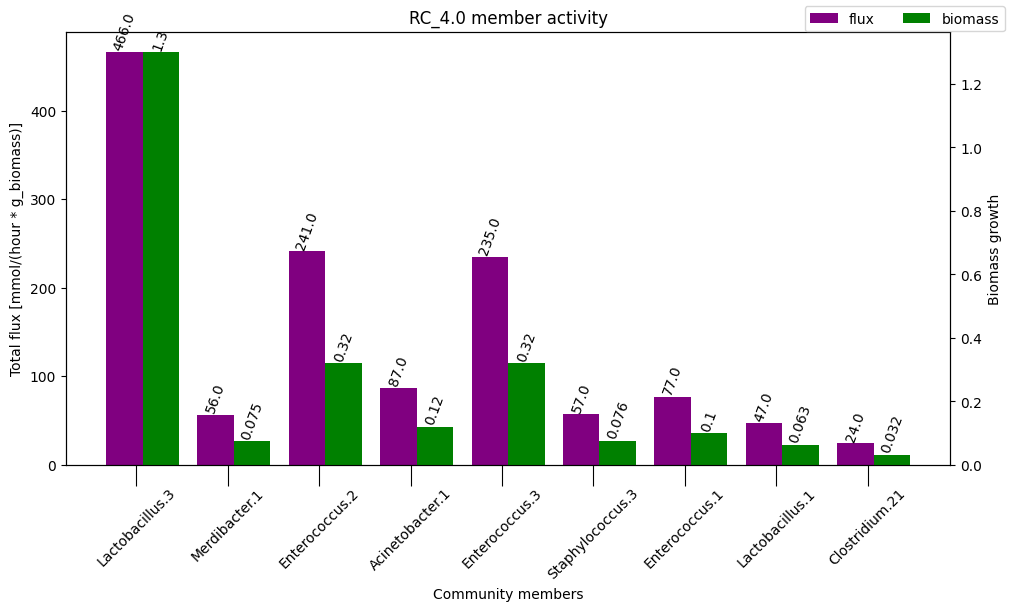

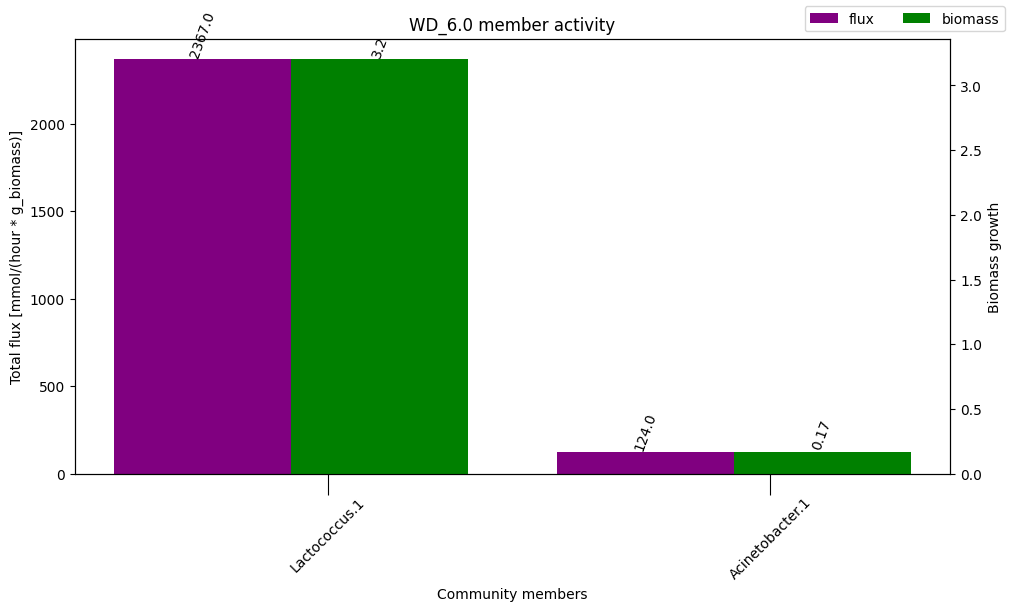

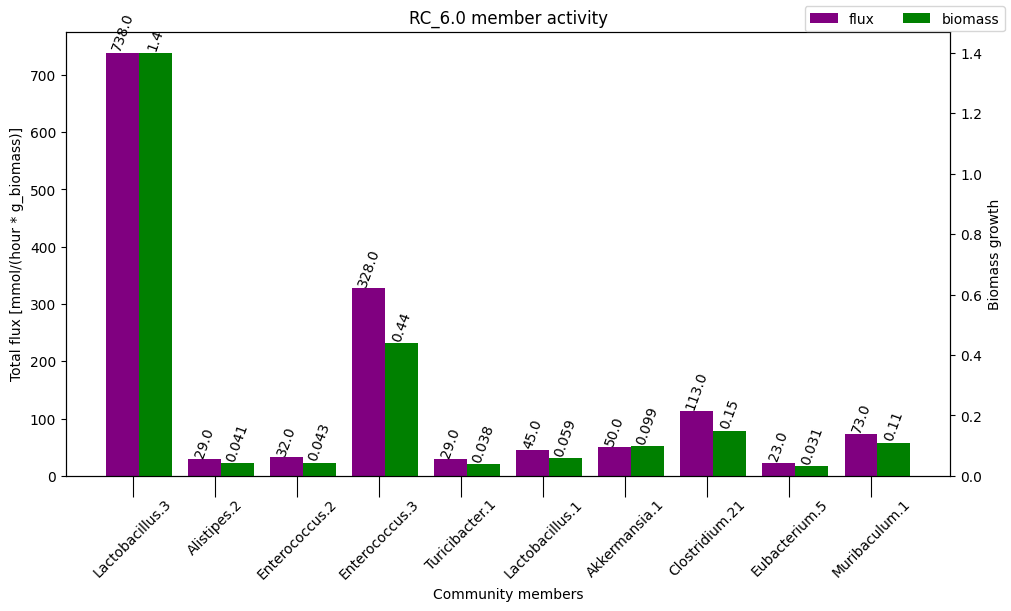

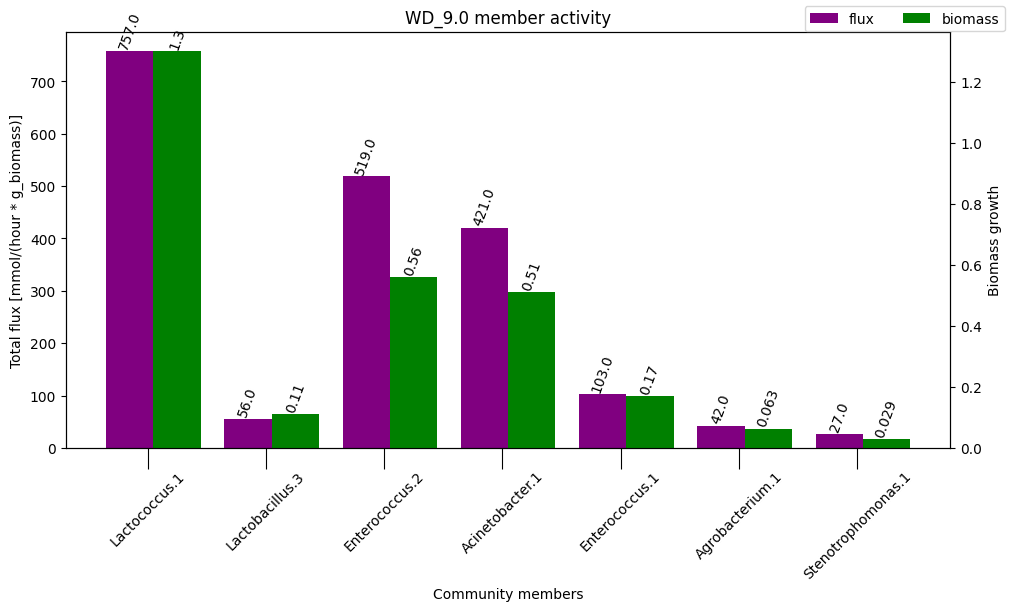

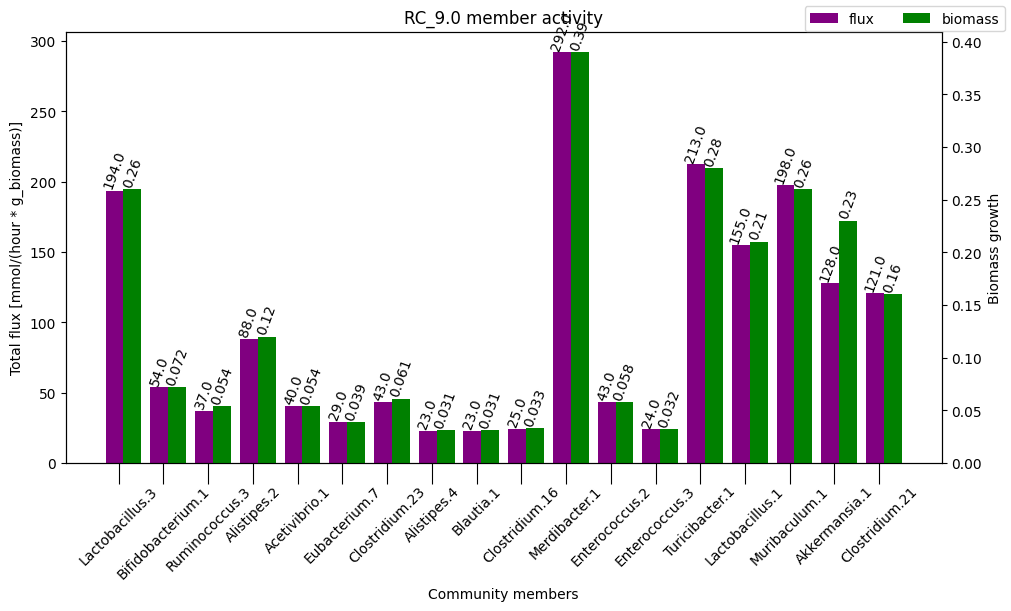

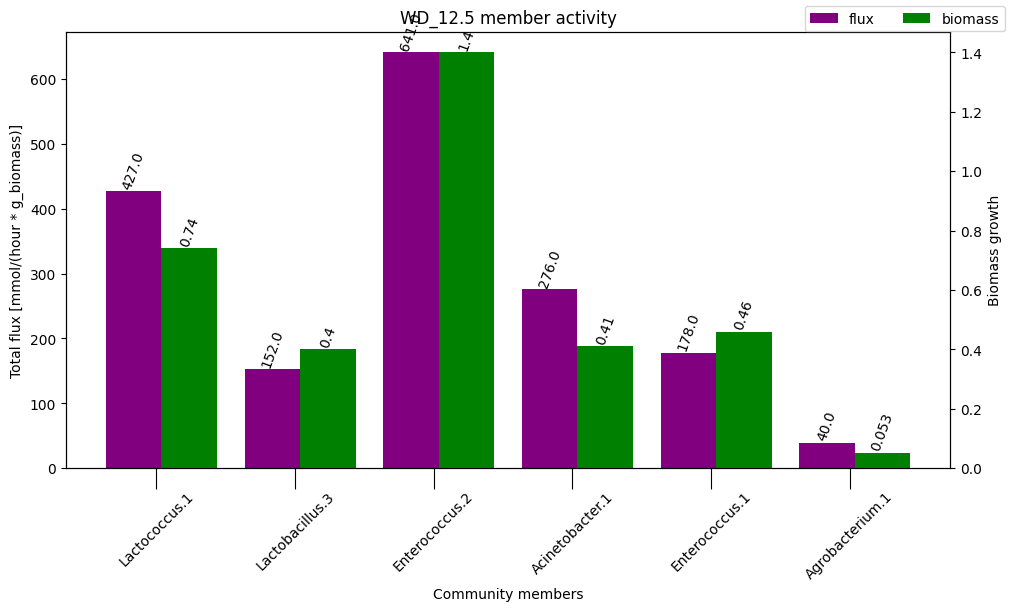

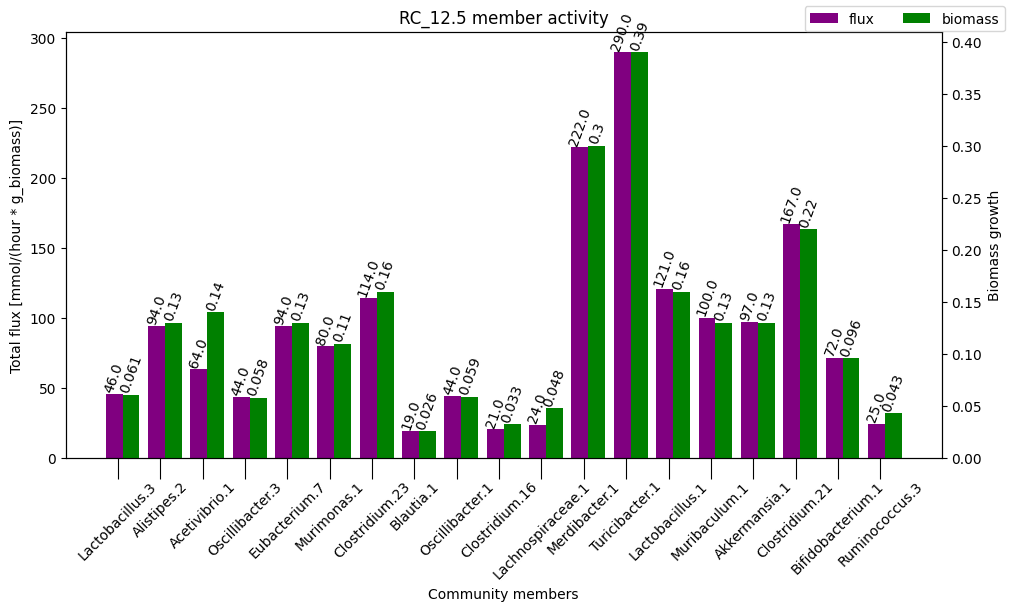

In [761]:
from numpy import array, round
import sigfig

def BarChart(member_stats, width=.8, baseDir=None, day_diet = None):
    ## simple carbs
    baseDir = baseDir or getcwd()
    fig, ax = pyplot.subplots(figsize=(10, 6), layout='constrained')
    ax2 = ax.twinx()
    colors = {"flux": "purple", "biomass": "green"}
    barss, barss2 = [], []
    padding = 1
    numCols = len(member_stats["flux"])
    xs = arange(numCols) * (1 + padding)
    for i, (flux_type, stats) in enumerate(member_stats.items()):
        print(flux_type, stats)
        if flux_type == "flux":
            barss.append(ax.bar(xs + width*i, list(stats.values()), width,
                                label="flux", color=colors["flux"]))
        elif flux_type == "biomass":
            barss2.append(ax2.bar(xs + width*i, [sigfig.round(x, 2) for x in stats.values()],
                                 width, label="biomass", color=colors["biomass"]))
    print(f"{len(barss)} bars")
    ### Add text labels above each bar
    for bars in barss:
        for bar in bars:
            val = bar.get_height()
            if val == 0:   continue
            location = "bottom"
            ax.text(bar.get_x() + bar.get_width()/2, val, f'{abs(round(val, 0))}',
                    ha='center', rotation=70, va=location, fontsize=10, color='black')
    for bars in barss2:
        for bar in bars:
            val = bar.get_height()
            if val == 0:   continue
            location = "bottom"
            ax2.text(bar.get_x() + bar.get_width()/2, val, f'{sigfig.round(val, 2)}',
                    ha='center', rotation=70, va=location, fontsize=10, color='black')
                
    ## curtail the figure
    ### define the legend
    handles1, labels1 = ax.get_legend_handles_labels()  # Get handles and labels from ax1
    handles2, labels2 = ax2.get_legend_handles_labels()  # Get handles and labels from ax2
    handles = handles1 + handles2  # Combine handles
    labels = labels1 + labels2  # Combine labels
    fig.legend(handles, labels, loc='upper right', ncols=2)
    
    ### update axes
    categories = list(member_stats["flux"].keys())
    ax.set_xticks(xs + width/numCols**.5)  # Center the tick labels
    ax.set_xticklabels(categories, rotation=45)
    ax.tick_params(axis='x', length=15, pad=0)  # Increase tick length and reduce padding
    ax.set_xlabel('Community members')
    ax.set_ylabel('Total flux [mmol/(hour * g_biomass)]')
    ax2.set_ylabel('Biomass growth')
    ax.set_title(f"{day_diet} member activity")
    
    fig.savefig(baseDir+f"/{day_diet}_member_activity_Fit.png")
            
            
# def BarChart2(type_stats, width=.5, baseDir=None, day_diet = None):
#     ## simple carbs
#     baseDir = baseDir or getcwd()
#     fig, ax = pyplot.subplots(figsize=(10, 6), layout='constrained')
#     colors = {"flux": "purple", "biomass": "green", "exchange": "orange"}
#     barss = []
#     padding = 1
#     for i, (flux_type, stats) in enumerate(type_stats.items()):
#         numCols = len(type_stats)
#         print(flux_type, stats)
#         if member == "Community consumption":
#             barss.append(ax.bar(member, round(stats, 1), width, label=member, color=colors["exchange"]))
#             continue
#         barFluxes = ax.bar(member, round(stats["flux"], 1), width, label="flux", color=colors["flux"])
        
#         ax2 = ax.twinx()
#         barGrowth = ax2.bar(member, round(stats["biomass"], 1), width, label="biomass", color=colors["biomass"])
#         barss.extend([barGrowth, barFluxes])
#     print(len(barss))
#     ### Add text labels above each bar
#     for bars in barss:
#         for bar in bars:
#             val = bar.get_height()
#             if val == 0:   continue
#             location = "top" if val > 0 else "bottom"
#             ax.text(bar.get_x() + bar.get_width()/2, val, f'{abs(val)}',
#                     ha='center', va=location, fontsize=10, color='white')
                
                
#     ## curtail the figure
#     ### define the legend
#     handles1, labels1 = ax.get_legend_handles_labels()  # Get handles and labels from ax1
#     handles2, labels2 = ax2.get_legend_handles_labels()  # Get handles and labels from ax2
#     handles = handles1 + handles2  # Combine handles
#     labels = labels1 + labels2  # Combine labels
#     ax1.legend(handles, labels, loc="upper left")
    
#     ### update the axes
#     categories = list(df.index)
#     # ax.set_xticks(xs + width*numCols/10)  # Center the tick labels
#     # ax.set_xticklabels(categories)
#     ax.set_xticklabels(list(member_stats.keys()), rotation=45)
#     ax.set_xlabel(f'{day_diet} Community members')
#     ax.set_ylabel('fluxes [mmol/(hour * g_biomass)]')
#     ax.set_title(f"{day_diet} member interactions")
    
#     fig.savefig(baseDir+f"/{day_diet}_member_activity.png")


# old approach, where the biomass is too small
days = ["-1.5", "1.5", "4.0", "6.0", "9.0", "12.5"]
for day in days:
    # WD diet
    BarChart(sample_member_stats[f"WD_{day}"], day_diet=f"WD_{day}")
    # RC diet
    BarChart(sample_member_stats[f"RC_{day}"], day_diet=f"RC_{day}")
    
# new approach
# BarChart2(type_stats)

    
# member_sample_set = {sample_member_stats}

In [505]:
# member_fluxes = {}
# for num in range(1,20):
#     # print(num)
#     member_fluxes[num] = total_fluxes[total_fluxes.index.str.contains(f"_[ce]{num}(?!\d)")]
#     print(member_fluxes[num][member_fluxes[num].index.str.contains("EX_")])

# member_fluxes[1]

Empty DataFrame
Columns: [RC_-1.5, RC_1.5, RC_4.0, RC_6.0, RC_9.0, RC_12.5, WD_-1.5, WD_1.5, WD_4.0, WD_6.0, WD_9.0, WD_12.5]
Index: []
Empty DataFrame
Columns: [RC_-1.5, RC_1.5, RC_4.0, RC_6.0, RC_9.0, RC_12.5, WD_-1.5, WD_1.5, WD_4.0, WD_6.0, WD_9.0, WD_12.5]
Index: []
Empty DataFrame
Columns: [RC_-1.5, RC_1.5, RC_4.0, RC_6.0, RC_9.0, RC_12.5, WD_-1.5, WD_1.5, WD_4.0, WD_6.0, WD_9.0, WD_12.5]
Index: []
Empty DataFrame
Columns: [RC_-1.5, RC_1.5, RC_4.0, RC_6.0, RC_9.0, RC_12.5, WD_-1.5, WD_1.5, WD_4.0, WD_6.0, WD_9.0, WD_12.5]
Index: []
Empty DataFrame
Columns: [RC_-1.5, RC_1.5, RC_4.0, RC_6.0, RC_9.0, RC_12.5, WD_-1.5, WD_1.5, WD_4.0, WD_6.0, WD_9.0, WD_12.5]
Index: []
Empty DataFrame
Columns: [RC_-1.5, RC_1.5, RC_4.0, RC_6.0, RC_9.0, RC_12.5, WD_-1.5, WD_1.5, WD_4.0, WD_6.0, WD_9.0, WD_12.5]
Index: []
Empty DataFrame
Columns: [RC_-1.5, RC_1.5, RC_4.0, RC_6.0, RC_9.0, RC_12.5, WD_-1.5, WD_1.5, WD_4.0, WD_6.0, WD_9.0, WD_12.5]
Index: []
Empty DataFrame
Columns: [RC_-1.5, RC_1.5, RC_4.

,RC_-1.5,RC_1.5,RC_4.0,RC_6.0,RC_9.0,RC_12.5,WD_-1.5,WD_1.5,WD_4.0,WD_6.0,WD_9.0,WD_12.5
compartment,,,,,,,,,,,,


In [136]:
member_fluxes[1][member_fluxes[1].index.str.contains("EX_")]

,WD_-1.5,WD_1.5,WD_4.0,WD_6.0,WD_9.0,WD_12.5,RC_-1.5,RC_1.5,RC_4.0,RC_6.0,RC_9.0,RC_12.5
id,,,,,,,,,,,,


# Correlation of metabolomics and community exchanges

In [271]:
from modelseedpy.biochem import from_local

msdb = from_local("../../ModelSEEDDatabase")

In [273]:
newIDname = {}
for cpd in msdb.compounds:
    newIDname[cpd.id] = cpd.name

from json import dump
dump(newIDname, open("IDname.json", 'w'), indent=3)

In [53]:
from pandas import read_csv
from json import load

# nameID = load(open("../../CommScores/commscores/data/compoundNames.json", 'r'))
# IDnames = {v:k for k,v in nameID.items()}

# fluxes = read_csv("ASVMetaboliteInteractions_names2.csv").set_index("ASV")
# fluxes.drop(columns=[col for col in fluxes.columns if 'ave' in col], inplace=True)
# aves = fluxes.sum()
# display(aves)
# fluxes = abs(read_csv("total_community_solutions.csv").set_index("id"))
exchanges = fluxes[fluxes.index.str.contains("EX_")]
exchanges.index.name = "exchange"
exchanges.index = [[ex.replace("EX_", '').replace("_e0", '')] for ex in exchanges.index]

display(exchanges)


# binarize the exchanges
threshold = 1e-6
conditions = [
    exchanges > threshold,
    (exchanges >= -threshold) & (exchanges <= threshold),
    exchanges < -threshold]
choices = [1, 0, -1]
df_thresholded = select(conditions, choices, default=0)
binarized_exchanges = DataFrame(df_thresholded, columns=exchanges.columns, index=exchanges.index)
display(binarized_exchanges)


# values = {}
# for exchange, row in exchanges.iterrows():
#     diet_day = f"{diet}_{day}"
#     if compound not in values:   values[compound] = {}
#     values[compound][diet_day] = ave

,RC_-1.5,RC_1.5,RC_4.0,RC_6.0,RC_9.0,RC_12.5,WD_-1.5,WD_1.5,WD_4.0,WD_6.0,WD_9.0,WD_12.5
cpd01080,-0.006055,-0.024584,-0.023052,0.000000,-0.014226,-0.018996,-0.011153,0.000000,0.00000,-0.073474,-0.149103,-0.092492
cpd00307,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000
cpd10515,-0.038730,-0.042194,-0.046451,-0.043070,-0.034987,-0.039306,-0.056432,-0.061476,-0.05902,-0.064677,-0.056004,-0.061248
cpd00084,-0.174491,-0.123321,-0.103006,-0.065380,-0.133393,-0.155451,-0.153698,-0.005124,0.00000,-0.194057,-0.177002,-0.178189
cpd00011,15.598919,14.922701,18.314246,20.972097,8.189995,4.439024,13.207141,0.000000,0.00000,0.000000,1.462878,10.972524
...,...,...,...,...,...,...,...,...,...,...,...,...
cpd00242,NaN,NaN,NaN,NaN,0.195395,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cpd00079,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cpd01502,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
cpd01150,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


,RC_-1.5,RC_1.5,RC_4.0,RC_6.0,RC_9.0,RC_12.5,WD_-1.5,WD_1.5,WD_4.0,WD_6.0,WD_9.0,WD_12.5
cpd01080,-1,-1,-1,0,-1,-1,-1,0,0,-1,-1,-1
cpd00307,0,0,0,0,0,0,0,0,0,0,0,0
cpd10515,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
cpd00084,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,-1
cpd00011,1,1,1,1,1,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
cpd00242,0,0,0,0,1,0,0,0,0,0,0,0
cpd00079,0,0,0,0,0,0,0,0,0,0,0,0
cpd01502,0,0,0,0,0,0,0,0,0,0,0,0
cpd01150,0,0,0,0,0,0,0,0,0,0,0,0


## load and process the metabolomics data

In [769]:
# compound_to_modelseed = {
#     '3alpha-hydroxy-7-oxo-5beta-cholan-24-oate': "cpd35610",
#     '2-deoxyribose': 'cpd01242',
#     'Pyroglutamic acid': 'cpd01293',
#     'alanine': 'cpd00035',
#     'beta-D-allose': 'cpd01055',
#     'L-(+)-Arabinose': 'cpd00185',
#     '(S)-2,4-diamino-4-oxobutanoic acid': 'cpd00132',
#     'L-Aspartic acid': 'cpd00041',
#     'Glucoscilliroside': "cpd00158",
#     'Cholic acid': 'cpd00526',
#     '2-Hydroxytricarballylic acid': 'cpd00218',  # Hydroxytricarballylate&#8203;:contentReference[oaicite:4]{index=4}.
#     'L-cys': 'cpd00084',  # L-Cysteine&#8203;:contentReference[oaicite:5]{index=5}.
#     'Decanoic acid': 'cpd00162',  # Decanoate&#8203;:contentReference[oaicite:6]{index=6}.
#     'deoxycholate': 'cpd02733',  # Deoxycholic acid.
#     'dodecanoic acid': 'cpd00301',  # Dodecanoate&#8203;:contentReference[oaicite:7]{index=7}.
#     'D-galactitol': 'cpd00418',  # Galactitol&#8203;:contentReference[oaicite:8]{index=8}.
#     'Levulose': 'cpd00161',  # D-Fructose (synonym Levulose)&#8203;:contentReference[oaicite:9]{index=9}.
#     'L-Fucose': 'cpd00247',  # Fucose&#8203;:contentReference[oaicite:10]{index=10}.
#     'fumarate': 'cpd00106',  # Fumarate&#8203;:contentReference[oaicite:11]{index=11}.
#     'aldehydo-D-galactose': 'cpd00108',  # D-Galactose&#8203;:contentReference[oaicite:12]{index=12}.
#     'Grape sugar': 'cpd00027',  # Glucose (common synonym: grape sugar)&#8203;:contentReference[oaicite:13]{index=13}.
#     'glt': 'cpd00209',  # Glutamate&#8203;:contentReference[oaicite:14]{index=14}.
#     'Aminoacetic acid': 'cpd00033',  # Glycine (common synonym: aminoacetic acid)&#8203;:contentReference[oaicite:15]{index=15}.
#     'Hexylic acid': 'cpd00109',  # Hexanoate&#8203;:contentReference[oaicite:16]{index=16}.
#     'alpha-amino-4-imidazoleproprionic acid': None,  # Closest match not found.
#     'indole': 'cpd00365',  # Indole&#8203;:contentReference[oaicite:17]{index=17}.
#     'ile': 'cpd00151',  # L-Isoleucine&#8203;:contentReference[oaicite:18]{index=18}.
#     'L-leu': 'cpd00107',  # L-Leucine12-cis-octadecadienoate': 'cpd11493',  # Linoleate .
#     '5-betd-3-alpha-ol': None,  # Closest match not found.
#     'lysine': 'cpd00039',  # L-Lysine .
#     'MALA': 'cpd00130',abbreviation MALA) .
#     'melibiose': 'cpd03198',  # MeliMethionine': 'cpd00060',  # L-Methionine .
#     'myristate': 'cpd00207',  # Myristate .
#     'cosamine': 'cpd00122',  # N-Acetylglucosamitinic acid': 'cpd00218',  # Nicotinate (synonym: nicotinic acid) . acid': 'cpd00245',  # Octanoate (synonym caprylic acid) .
#     '(S)-2,5-Dia': None,  # Closest match not found.
#     'palmitate': 'cpd00159',  # Pa'(S)-alpha-Amino-beta-phenylpropionic acid': None,  # Closest match not found.
#     'Picolinic acid': 'cpd01078te .
#     'L-proline': 'cpd00129',  # Proline .
#     '2-oxopropanoic acid': 'cpd00048',  # Pyruvate .
#     'D-raffinose': 'cpd00499',      'L-Rhamnose': 'cpd00396',  # Rhamnosese': 'cpd00105',  # Ribose .
#     'D-serine': 'cpd005ne .
#     'butanedioic acid': 'cpd00036',  # Snym: butanedioic acid) .
#     'Glc(alpha1->2e,  # Closest match not found.
#     '2-Abutyric acid': None,  # Closest match notyr': 'cpd00069',  # L-Tyrosine .
#     '3alpha,7beta-dihydroxy-5beta-cholan-24-o Closest match not found.
#     'pentanoic acid': 'cpd00431',  # Valerate (synonym: pentanoic acid) .
#     'L-valine': 'cpd00156',  # Valine .
#     '2-oxopentanedionate': None,tch not found.
#     'cis-9-octadecenoic acid': 'cpd11493',  # Oleate .
#     'Erythrite': 'cpd00799',  # Erythritol (synonym: Erythrite) .
#     'inositol': 'cpd00nositol (synonym: inositol) .
#     '(2S,yrrolidinium-2-carboxylate': None  # Closest match not found.
# }

In [54]:
from json import load, dump
from pandas import DataFrame
from numpy import select

MSID_BiGG_mapping = load(open("../../CommScores/commscores/data/BiGG_to_MSID.json", 'r'))
IDnames = {v:k for k,v in load(open("../../CommScores/commscores/data/compoundNames.json", 'r')).items()}
# display(IDnames)

# loading and organizing the metabolomics data
metabolomics = read_csv("complete_mapping_metabolomics.csv").set_index("SampleName").drop("Unnamed: 0", axis=1)
newCols = []
for c in metabolomics.columns:
    cpdID = MSID_BiGG_mapping[c]
    # if cpdID == "cpd00751":  newCols.append("L-Fucose") ; continue
    # if cpdID == "cpd00122":  newCols.append("N-Acetyl-D-glucosamine") ; continue
    # if cpdID == "cpd00396":  newCols.append("L-Rhamnose") ; continue
    # newCols.append(IDnames[cpdID])
    newCols.append(cpdID)
metabolomics.columns = newCols
metabolomics.fillna(0, inplace=True)
metabolomics.drop([x for x in ["RC_001", "WD_001"] if x in metabolomics.index], axis=0, inplace=True)

# parse day and diet metadata labels
metaData = read_csv("../../../ABX_mouse_gut/data/metabolomics_meta.csv").set_index("Sample.ID")
metaData.drop(["RC_001", "WD_001"], inplace=True)
trialDay = dict(zip(metaData.index.to_numpy(), metaData["Rec_day_adj"].to_numpy()))
trialDiet = dict(zip(metaData.index.to_numpy(), [x.split("-")[0] for x in metaData["Treatment"].to_numpy()]))

# add the trial metadata and aggregate results by these organizations
metabolomics["Rec_day_adj"] = [str(trialDay[trial]) for trial in metabolomics.index]
metabolomics["diet"] = [trialDiet[trial] for trial in metabolomics.index]
metabolomics["diet_day"] = metabolomics["diet"] + "_" + metabolomics["Rec_day_adj"]
metabolomics = metabolomics.groupby(['diet_day']).sum()
metabolomics.drop(["diet", "Rec_day_adj"], axis=1, inplace=True)
metabolomics = metabolomics.T



## log2 between adjacent diet+day points for comparison with the predicted values
from numpy import log2

RCintervals = [["RC_-3", "RC_0"], ["RC_0", "RC_3"], ["RC_3", "RC_5"], ["RC_5", "RC_7"], ["RC_7", "RC_11"], ["RC_11", "RC_14"]]
WDintervals = [["WD_-3", "WD_0"], ["WD_0", "WD_7"], ["WD_7", "WD_11"], ["WD_11", "WD_14"]]

for cols in RCintervals:
    day1, day2 = cols[0].split("_")[-1], cols[1].split("_")[-1]
    aveDay = (int(day1)+int(day2))/2
    metabolomics[f"RC_{aveDay}"] = [max([-3, min([3, x])]) for x in log2(metabolomics[cols[1]]/metabolomics[cols[0]])]
    metabolomics.drop(cols[0], axis=1, inplace=True)

for cols in WDintervals:
    day1, day2 = cols[0].split("_")[-1], cols[1].split("_")[-1]
    aveDay = (int(day1)+int(day2))/2
    metabolomics[f"WD_{aveDay}"] = [max([-3, min([3, x])]) for x in log2(metabolomics[cols[1]]/metabolomics[cols[0]])]
    metabolomics.drop(cols[0], axis=1, inplace=True)

metabolomics["WD_1.5"] = metabolomics["WD_3.5"]
metabolomics["WD_4"] = metabolomics["WD_3.5"]
metabolomics["WD_6"] = metabolomics["WD_3.5"]
metabolomics.drop([col for col in metabolomics.columns if any([x in col for x in ["3.5", "14", "28"]])], axis=1, inplace=True)
diet_days = metabolomics.columns
print(metabolomics.index)
metabolomics.T.to_csv("regenerated_log2_metabolomics.csv")
# display(metabolomics)
dump(metabolomics.T.to_dict(), open("regenerated_log2_metabolomics.json", 'w'), indent=3)


# metabolomics = read_csv("metabolomics_log2_fold_change.csv").set_index("day_diet diff")
# metabolomics.index = [x.replace("-ABX", '') for x in metabolomics.index]
# metabolomics = metabolomics.T
# metabolomics["WD_1.5"] = metabolomics["WD_3.5"]
# metabolomics["WD_4"] = metabolomics["WD_3.5"]
# metabolomics["WD_6"] = metabolomics["WD_3.5"]
# metabolomics = metabolomics[diet_days]
# display(metabolomics)


# binarize the exchanges
# Apply the threshold criteria
threshold = 1
conditions = [
    metabolomics > threshold,
    (metabolomics >= -threshold) & (metabolomics <= threshold),
    metabolomics < -threshold]
choices = [1, 0, -1]
df_thresholded = select(conditions, choices, default=0)
binarized_metabolomics = DataFrame(df_thresholded, columns=metabolomics.columns, index=metabolomics.index)
# display(binarized_metabolomics)

## TODO:   Correlating the log2 fold changes may be preferable to the average

# measured = {}
# for index, row in metabolomics.iterrows():
#     measured[index] = row.to_dict()
# display(measured)

Index(['cpd35610', 'cpd01242', 'cpd01293', 'cpd00035', 'cpd01055', 'cpd00224',
       'cpd00132', 'cpd00041', 'cpd00158', 'cpd00526', 'cpd00137', 'cpd00084',
       'cpd01107', 'cpd02733', 'cpd01741', 'cpd01171', 'cpd00082', 'cpd00751',
       'cpd00106', 'cpd00108', 'cpd00027', 'cpd00023', 'cpd00033', 'cpd01113',
       'cpd00119', 'cpd00359', 'cpd00322', 'cpd00107', 'cpd01122', 'cpd02475',
       'cpd00039', 'cpd00130', 'cpd03198', 'cpd00060', 'cpd03847', 'cpd00122',
       'cpd00218', 'cpd03846', 'cpd00064', 'cpd00214', 'cpd00066', 'cpd07053',
       'cpd00129', 'cpd00020', 'cpd00382', 'cpd00396', 'cpd00105', 'cpd00550',
       'cpd00036', 'cpd00076', 'cpd00161', 'cpd00069', 'cpd04945', 'cpd00597',
       'cpd00156', 'cpd00024', 'cpd00536', 'cpd00392', 'cpd00121', 'cpd00851'],
      dtype='object')


/home/afreiburger/.local/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/afreiburger/.local/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/afreiburger/.local/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/afreiburger/.local/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/afreiburger/.local/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/afreiburger/.local/lib/python3.11/site-packages/pandas

## compute correlations

In [55]:
from sklearn.linear_model import LinearRegression
from numpy import corrcoef
from numpy import array, mean

overlapping_exchanges = list(set(metabolomics.index) & set(exchanges.index))
print(overlapping_exchanges)
correlations = {}
for index, row in metabolomics.loc[overlapping_exchanges].iterrows():
    xs, ys = array(exchanges.loc[index].tolist()).reshape(-1, 1), array(row.tolist())
    model = LinearRegression()
    model.fit(xs, ys)
    correlations[index] = model.score(xs, ys)
    # correlations[index] = corrcoef(xs, ys)[0, 1]
    

correlations = dict(sorted(correlations.items(), key=lambda item: item[1], reverse=True))
print(mean(list(correlations.values())))
display(correlations)
from json import dump
dump(correlations, open("metabolomics_correlations.json", 'w'), indent=3)

print()

overlapping_exchanges = list(set(binarized_metabolomics.index) & set(binarized_exchanges.index))
correlations = {}
for index, row in binarized_metabolomics.loc[overlapping_exchanges].iterrows():
    newMetabolomics = []
    newExchanges = array(exchanges.loc[index].tolist())
    remove_indices = []
    # for i, x in enumerate(row.tolist()):
        # if x == 0: print(i,x) ; remove_indices.append(False)
        # else:  newMetabolomics.append(x)  ; remove_indices.append(True)
    if len(remove_indices) == len(row):  continue
    xs, ys = array(newExchanges[remove_indices]).reshape(-1, 1), array(newMetabolomics)
    
    model = LinearRegression()
    model.fit(xs, ys)
    correlations[index] = model.score(xs, ys)
    # correlations[index] = corrcoef(xs, ys)[0, 1]

correlations = dict(sorted(correlations.items(), key=lambda item: item[1], reverse=True))
print(mean(list(correlations.values())))
display(correlations)

from json import dump
dump(correlations, open("binarized_metabolomics_correlations.json", 'w'), indent=3)

['cpd00526', 'cpd00382', 'cpd00036', 'cpd00069', 'cpd03198', 'cpd03847', 'cpd00023', 'cpd00084', 'cpd00121', 'cpd00132', 'cpd00122', 'cpd00033', 'cpd00020', 'cpd00161', 'cpd00158', 'cpd00751', 'cpd00322', 'cpd00156', 'cpd00039', 'cpd01055', 'cpd00129', 'cpd00027', 'cpd01107', 'cpd00119', 'cpd00218', 'cpd01171', 'cpd00076', 'cpd00024', 'cpd00106', 'cpd00130', 'cpd00066', 'cpd00082', 'cpd00041', 'cpd00224', 'cpd00060', 'cpd03846', 'cpd00550', 'cpd01242', 'cpd00108', 'cpd00214', 'cpd00105', 'cpd01293', 'cpd00107', 'cpd00536', 'cpd00137', 'cpd01741', 'cpd00035', 'cpd00396', 'cpd00851', 'cpd00064', 'cpd02733']
0.06909341836966526


{'cpd00119': 1.0,
 'cpd01107': 0.3555869699683918,
 'cpd00039': 0.3400110814955041,
 'cpd00106': 0.21035436797672513,
 'cpd00035': 0.1986979321632143,
 'cpd00020': 0.18451684859373607,
 'cpd00751': 0.15908667683814948,
 'cpd03847': 0.13550164228353145,
 'cpd00027': 0.1156005171497777,
 'cpd00851': 0.08433570318567585,
 'cpd01171': 0.07536551489118581,
 'cpd00041': 0.0647912076916839,
 'cpd00396': 0.06182136792906112,
 'cpd00214': 0.05579188854602457,
 'cpd00076': 0.05494184324046347,
 'cpd03846': 0.04475692524354391,
 'cpd01242': 0.03506831889878126,
 'cpd00129': 0.03445199240876007,
 'cpd00024': 0.03250925229552737,
 'cpd00550': 0.032089582127062144,
 'cpd00137': 0.02754814749675394,
 'cpd00066': 0.02693853990641959,
 'cpd00161': 0.0258551366338603,
 'cpd00064': 0.025730584695853875,
 'cpd01055': 0.018181539068022334,
 'cpd00158': 0.017890087538461108,
 'cpd00218': 0.016717947055373883,
 'cpd00130': 0.015834136630869078,
 'cpd00084': 0.014046684027174683,
 'cpd00107': 0.01330515717041

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by LinearRegression.

### calculate the categorical correlations

In [85]:
from json import load
from numpy import array, save

simpleCarbons = array([("cpd00036", "Succinate"), ("cpd00137", "Citrate"), ("cpd00130", "L-Malate"), ("cpd00020", "Pyruvate")])
save("../../CommScores/commscores/data/categories/simpleCarbons.npy", simpleCarbons)

with open("metabolomics_categories.json", 'r') as jsonIn:
    compounds = load(jsonIn)
    
with open("../../CommScores/commscores/data/compoundNames.json", 'r') as jsonIn:
    cpdNames = load(jsonIn)
    
IDnames = {ID:name for name,ID in cpdNames.items()}
# display(IDnames)
    
cpdCategory = {ele:k for k,v in compounds.items() for ele in v}
# cpdCategory

In [96]:
from numpy import load

scfa = dict(load("../../CommScores/commscores/data/categories/scfa.npy"))
vitamins = dict(load("../../CommScores/commscores/data/categories/vitamins.npy"))
aminoAcids = dict(load("../../CommScores/commscores/data/categories/allAAs.npy"))
sugars = dict(load("../../CommScores/commscores/data/categories/sugars.npy"))
complex_sugars = dict(load("../../CommScores/commscores/data/categories/complex_sugars.npy"))
fatty_acids = dict(load("../../CommScores/commscores/data/categories/fattyAcids.npy"))
simple = dict(load("../../CommScores/commscores/data/categories/simpleCarbons.npy"))
    
cpdCategory = {}
for m in scfa:
    cpdCategory[m] = "SCFA"
for m in vitamins:
    cpdCategory[m] = "vitamin"
for m in aminoAcids:
    cpdCategory[m] = "AA"
for m in sugars:
    cpdCategory[m] = "sugar"
for m in complex_sugars:
    cpdCategory[m] = "complex_sugar"
for m in fatty_acids:
    cpdCategory[m] = "FA"
for m in simple:
    cpdCategory[m] = "simple_carbon"



## categorized metabolomics
categorized_metabolomics = metabolomics.copy()
categorized_metabolomics.index.name = "category"
categorized_metabolomics.index = [cpdCategory.get(i, "other") for i in categorized_metabolomics.index]
categorized_metabolomics = categorized_metabolomics.groupby(level=0).sum()
display(categorized_metabolomics)

## categorized flux exchanges
categorized_exchanges = exchanges.copy()
# categorized_exchanges.index.name = "category"
categorized_exchanges.index = [cpdCategory.get(i, "other") for i in categorized_exchanges.index]
categorized_exchanges = categorized_exchanges.groupby(level=0).sum()
display(categorized_exchanges)

{'cpd00027': 'D-Glucose',
 'cpd00076': 'Sucrose',
 'cpd00082': 'D-Fructose',
 'cpd00105': 'D-Ribose',
 'cpd00108': 'Galactose',
 'cpd00138': 'D-Mannose',
 'cpd00154': 'Xylose',
 'cpd00163': 'UDP-xylose',
 'cpd00179': 'Maltose',
 'cpd00185': 'D-Arabinose',
 'cpd00190': 'beta-D-Glucose',
 'cpd00212': 'L-Sorbose',
 'cpd00217': 'Brachiose',
 'cpd00224': 'L-Arabinose',
 'cpd00234': '5-Dehydro-D-fructose',
 'cpd00258': 'D-Ribulose',
 'cpd00259': 'D-Lyxulose',
 'cpd00261': 'L-Lyxulose',
 'cpd00368': 'D-Lyxose',
 'cpd00396': 'L-Rhamnose',
 'cpd00397': 'L-Ribulose',
 'cpd00455': '2-Deoxy-D-glucose',
 'cpd00524': '2-Inosose',
 'cpd00548': 'D-Hexose',
 'cpd00568': 'D-Sorbose',
 'cpd00589': 'D-Tagatose',
 'cpd00642': 'L-Rhamnulose',
 'cpd00665': 'alpha-Maltose',
 'cpd00691': 'UDP-L-arabinose',
 'cpd00709': 'beta D-Galactose',
 'cpd00724': 'alpha-D-Galactose',
 'cpd00750': 'D-Fucose',
 'cpd00751': 'L-Fucose',
 'cpd00818': '6-Phospho-D-galactose',
 'cpd00993': 'Hexose',
 'cpd00995': 'Ketose',
 'cpd0

diet_day,RC_-1.5,RC_1.5,RC_4.0,RC_6.0,RC_9.0,RC_12.5,WD_-1.5,WD_9.0,WD_12.5,WD_1.5,WD_4,WD_6
AA,-37.410251,1.704556,16.758712,-5.723376,-1.549512,22.797123,-49.347686,3.421603,35.907381,16.488314,16.488314,16.488314
FA,-19.554079,-1.865300,-0.115368,3.209974,10.722407,-2.260585,-24.000000,-0.970391,-1.364570,19.569103,19.569103,19.569103
SCFA,-4.859647,-0.519159,0.724447,0.904500,3.184401,0.287551,-6.000000,0.145547,0.338971,3.037199,3.037199,3.037199
complex_sugar,0.000000,2.408013,-2.177094,2.540217,5.805143,2.619051,5.079762,2.819005,3.126070,4.091613,4.091613,4.091613
other,-25.485810,-4.341874,7.296135,20.216613,12.757068,-1.489597,-30.022231,20.401807,15.309728,18.232135,18.232135,18.232135
simple_carbon,-10.203182,2.084418,1.777095,3.894276,-0.090230,1.367078,-9.821368,3.082042,9.902812,5.300832,5.300832,5.300832
sugar,-8.812149,2.666239,-8.520175,10.014058,7.851731,8.530200,-13.249868,-1.562210,7.460701,18.510769,18.510769,18.510769
vitamin,-3.000000,1.079072,1.032101,1.210756,1.929071,0.062267,-3.000000,0.422995,1.828288,1.516398,1.516398,1.516398


,RC_-1.5,RC_1.5,RC_4.0,RC_6.0,RC_9.0,RC_12.5,WD_-1.5,WD_1.5,WD_4.0,WD_6.0,WD_9.0,WD_12.5
AA,-10.180414,-10.145063,-9.799647,-9.817361,-9.880992,-10.208614,-15.816179,-19.094815,-18.975487,-20.097490,-15.336354,-15.501531
FA,-0.712585,-0.731114,-0.728402,-0.548746,-0.532086,-0.483543,-2.192920,-1.789121,-1.746754,-1.619003,-2.644479,-2.336273
SCFA,13.344836,12.405958,10.778583,4.917086,5.103739,4.722652,3.738473,-0.334875,0.000000,-0.821641,8.297200,6.912512
complex_sugar,-0.629758,-0.629758,-0.629758,-0.629758,-0.629758,-0.629758,-0.625573,-0.625573,-0.625573,-0.625573,-0.625573,-0.625573
other,30.818342,26.649621,29.043614,34.219882,28.742772,25.335843,30.668855,66.825662,65.936700,46.985615,14.130423,20.781634
simple_carbon,0.000000,0.000000,0.000000,0.158358,0.000000,0.000000,-0.937500,-1.250000,-1.250000,-1.250000,0.000000,0.000000
sugar,-5.551657,-4.332204,-4.129625,-3.815222,-2.799150,-1.784503,-2.149631,-3.399231,-3.399231,-3.399231,-1.311840,-1.524231
vitamin,-0.148959,-0.140682,-0.126434,-0.118652,-0.128046,-0.144546,-0.233353,-0.244918,-0.237713,-0.247358,-0.175743,-0.186589


In [94]:
from sklearn.linear_model import LinearRegression
from numpy import corrcoef
from numpy import array, mean

overlapping_exchanges = list(set(categorized_metabolomics.index) & set(categorized_exchanges.index))
print(overlapping_exchanges)
correlations = {}
for index, row in categorized_metabolomics.loc[overlapping_exchanges].iterrows():
    xs, ys = array(categorized_exchanges.loc[index].tolist()).reshape(-1, 1), array(row.tolist())
    model = LinearRegression()
    model.fit(xs, ys)
    correlations[index] = model.score(xs, ys)
    # correlations[index] = corrcoef(xs, ys)[0, 1]
    

correlations = dict(sorted(correlations.items(), key=lambda item: item[1], reverse=True))
print(mean(list(correlations.values())))
display(correlations)
from json import dump
dump(correlations, open("categorized_correlations.json", 'w'), indent=3)

['FA', 'simple_carbon', 'complex_sugar', 'vitamin', 'AA', 'sugar', 'SCFA', 'other']
0.09773965543995221


{'sugar': 0.25198971859468255,
 'complex_sugar': 0.23417727400464472,
 'FA': 0.07159515590372023,
 'other': 0.06919073840099399,
 'SCFA': 0.06169552379650467,
 'AA': 0.0586256727008726,
 'simple_carbon': 0.02601890573913135,
 'vitamin': 0.008624254379067553}

#### matching IDs between the simulation fluxes and the metabolomics data

In [4]:
# fluxesMetabolomics_mapping = {
#     'L-Valine': 'L-valine',
#     'L-Histidine': 'alpha-amino-4-imidazoleproprionic acid',
#     'Palmitate': 'palmitate',
#     'L-Inositol': 'inositol',
#     'L-Arabinose': 'L-(+)-Arabinose',
#     'Sucrose': 'Glc(alpha1->2beta)Fru',
#     'trans-4-Hydroxy-L-proline': '(2S,4R)-4-hydroxypyrrolidinium-2-carboxylate',
#     'L-Malate': 'MALA',
#     'Butyrate': 'pentanoic acid',   # close match
#     '5-Oxoproline': 'Pyroglutamic acid',
#     'Citrate': '2-Hydroxytricarballylic acid',
#     'Pyruvate': '2-oxopropanoic acid',
#     'L-Alanine': 'alanine',
#     'L-Aspartate': 'L-Aspartic acid',
#     'Glycine': 'Aminoacetic acid',
#     'L-Threonine': '2-Amino-3-hydroxybutyric acid',
#     'D-Fructose': 'Levulose',
#     'L-Leucine': 'L-leu',
#     'Myristic acid': 'myristate',
#     'L-Lysine': 'lysine',
#     'D-Serine': 'D-serine',
#     'Ornithine': '(S)-2,5-Diaminopentanoate',
#     'Niacin': 'nicotinic acid',
#     'L-Cysteine': 'L-cys',
#     'L-Phenylalanine': '(S)-alpha-Amino-beta-phenylpropionic acid',   # close match
#     'L-Asparagine': '(S)-2,4-diamino-4-oxobutanoic acid',
#     'Melibiose': 'melibiose',
#     'D-Allose': 'beta-D-allose',
#     'Dextrose': 'Grape sugar',
#     'Propionate': 'pentanoic acid',
#     'Fumarate': 'fumarate',
#     'L-Glutamate': 'glt',
#     'L-Tyrosine': 'tyr',
#     'L-Proline': 'L-proline',
#     'Decanoate': 'Decanoic acid',
#     'Succinate': 'butanedioic acid',
#     '2-Oxoglutarate': '2-oxopentanedionate',
#     'Melitose': 'D-raffinose',
#     'L-Isoleucine': 'ile',
#     "Galactose": "aldehydo-D-galactose"
# }


In [5]:
# metabolomicsKeys = set(list(aves["WD"].keys()))
# predictedKeys = set(list(predicted["WD"].keys()))
# print(predictedKeys)
# print(metabolomicsKeys-predictedKeys-set(list(compound_mapping.keys())))
# # print(predictedKeys-metabolomicsKeys)
# newMetabolomics = {}
# for k,v in metabolomicsKeys:
#     if k not in compound_mapping:   newMetabolomics[k] = v
#     else:   newMetabolomics[compound_mapping[k]] = v

# predictedRCs = list(predicted["RC"].values())
# averagesRCs = [aves["RC"][k] for k in predicted["RC"].keys() if k in aves["RC"]]

# predictedWDs = list(predicted["WD"].values())
# averagesWDs = [aves["WD"][k] for k in predicted["WD"].keys() if k in aves["WD"]]


# print(averagesRCs, averagesWDs)

The L-Methionine has not been mapped, and is skipped
The D-Glucose has not been mapped, and is skipped
The Dulcose has not been mapped, and is skipped
The N-Acetyl-D-glucosamine has not been mapped, and is skipped
The D-Ribose has not been mapped, and is skipped
The CELB has not been mapped, and is skipped


/tmp/ipykernel_623740/1164464659.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  pyplot.figure()


The Acetate has not been mapped, and is skipped
The Thyminose has not been mapped, and is skipped
The L-Fucose has not been mapped, and is skipped
The L-Rhamnose has not been mapped, and is skipped


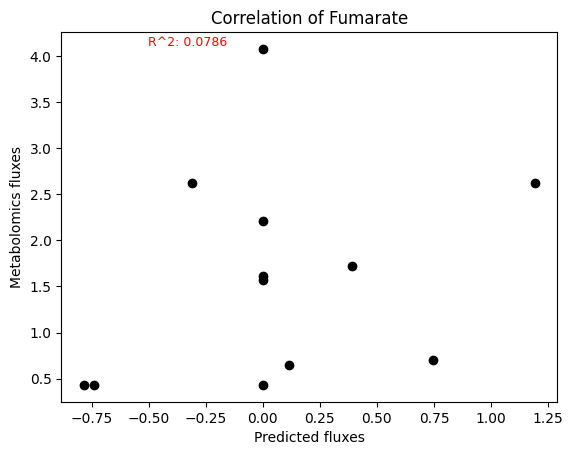

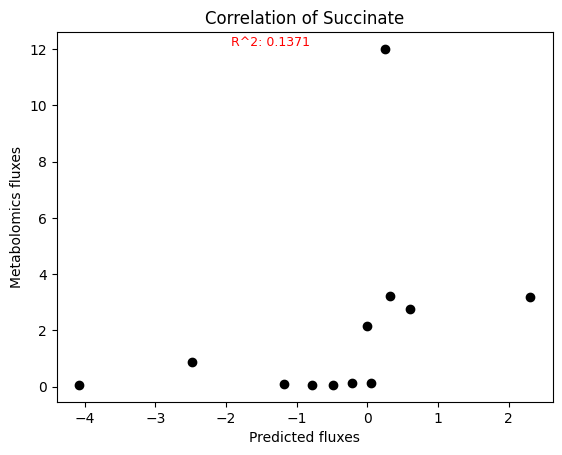

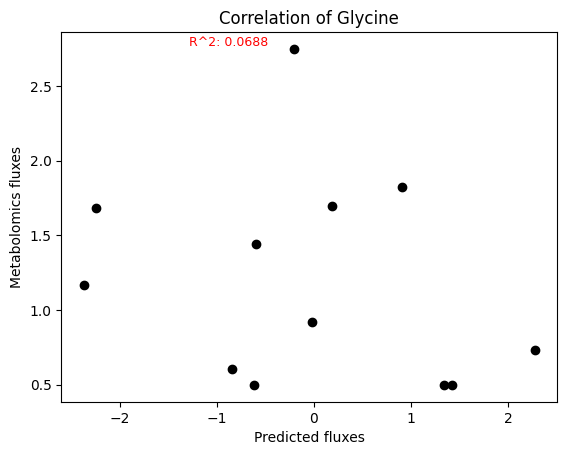

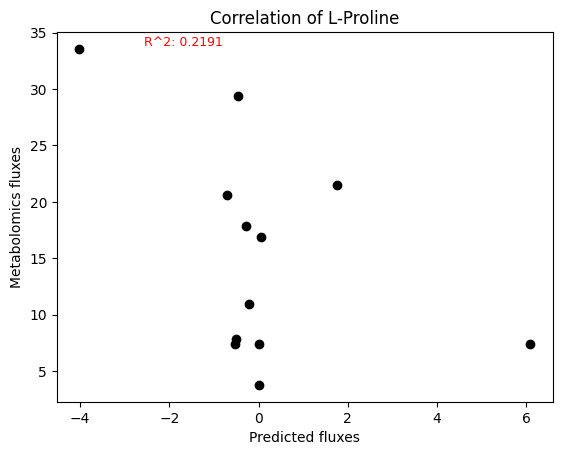

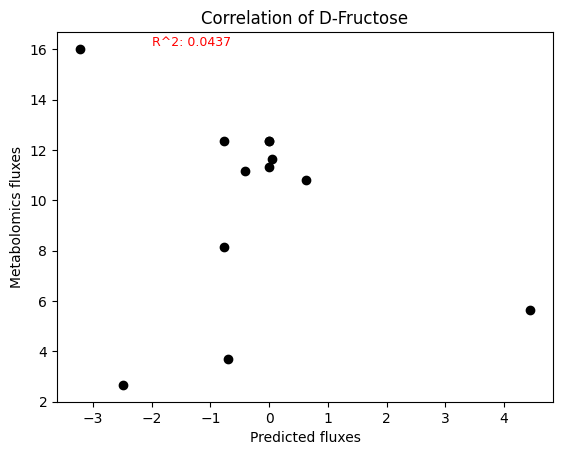

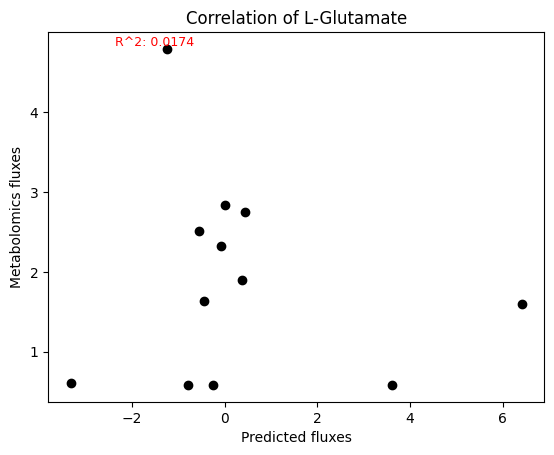

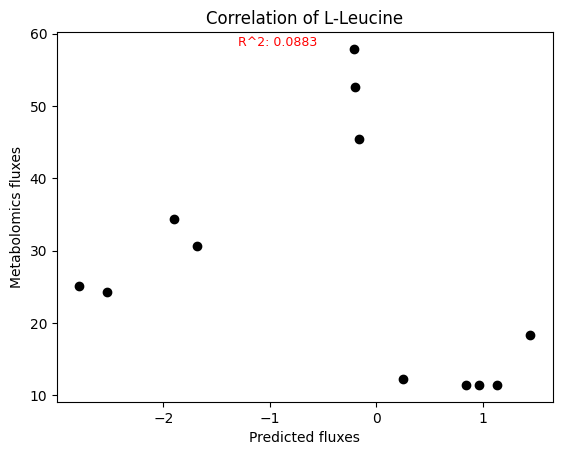

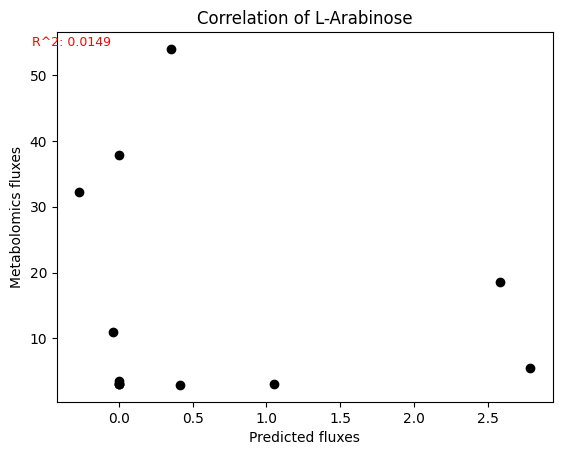

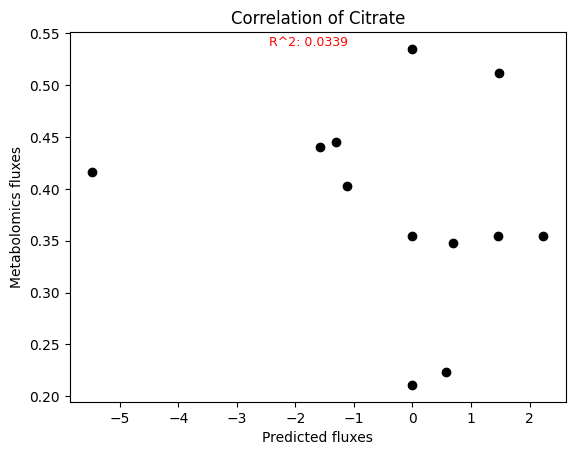

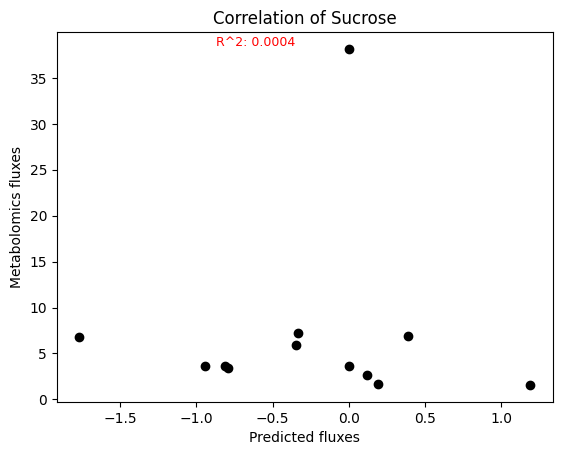

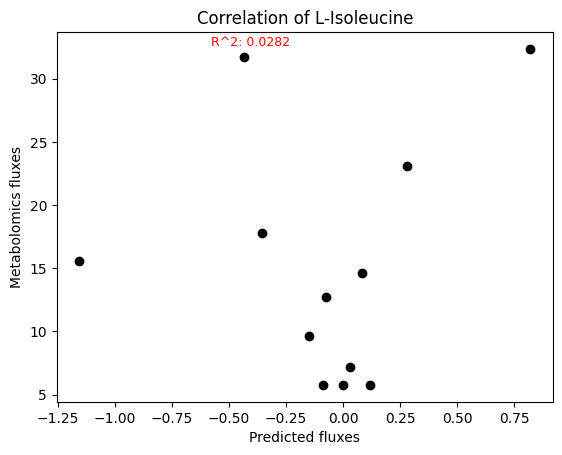

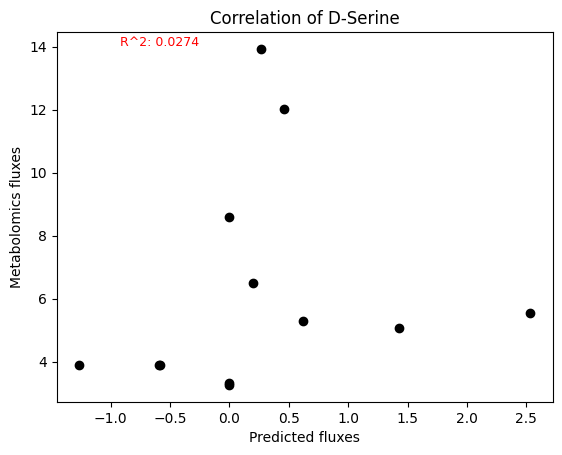

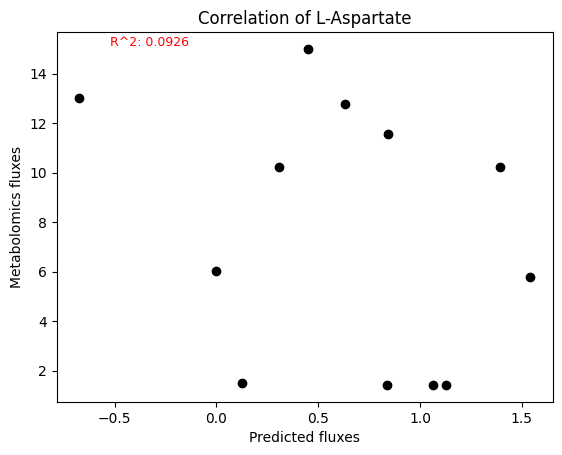

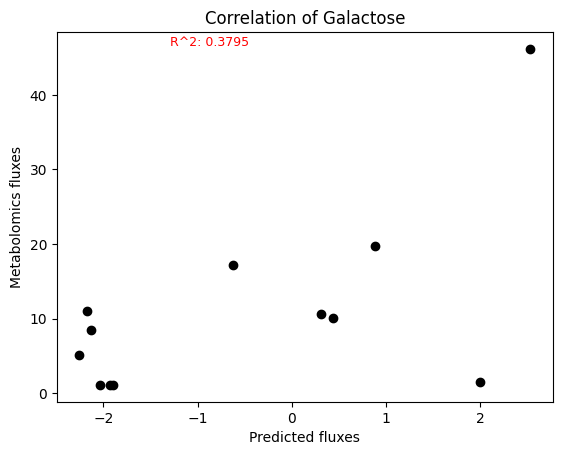

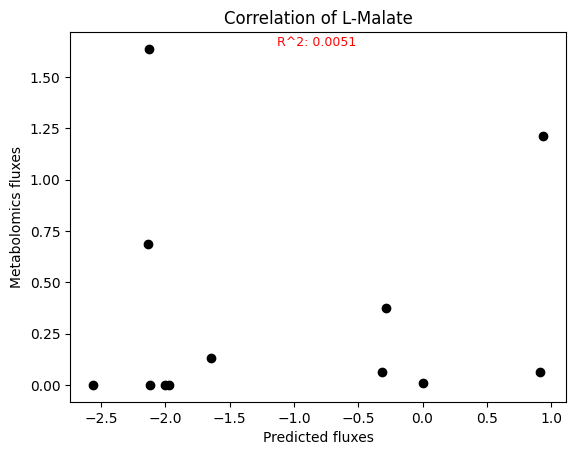

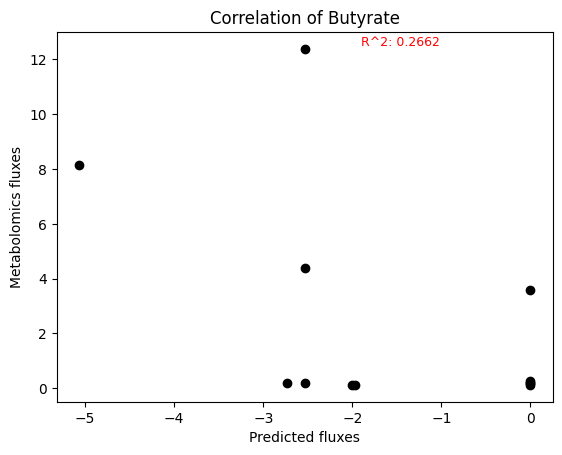

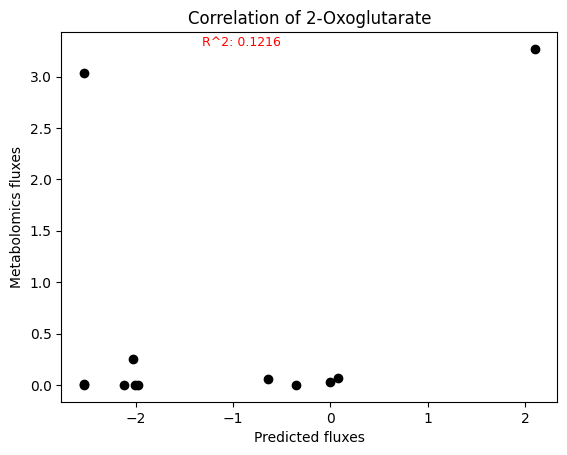

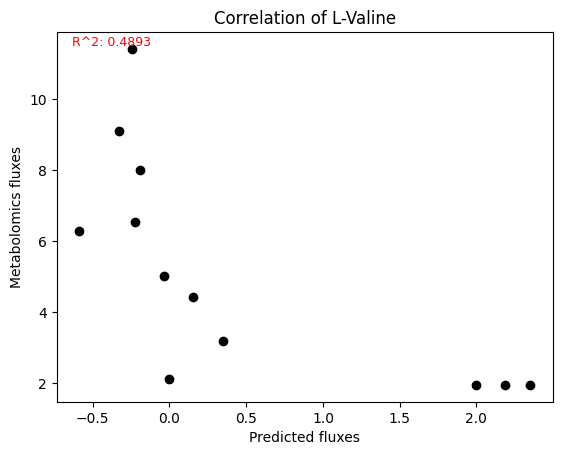

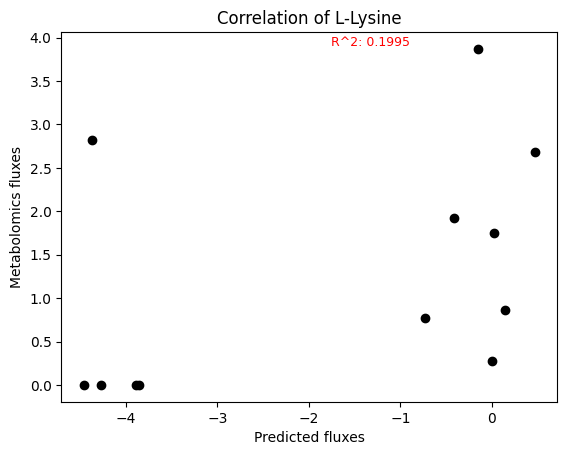

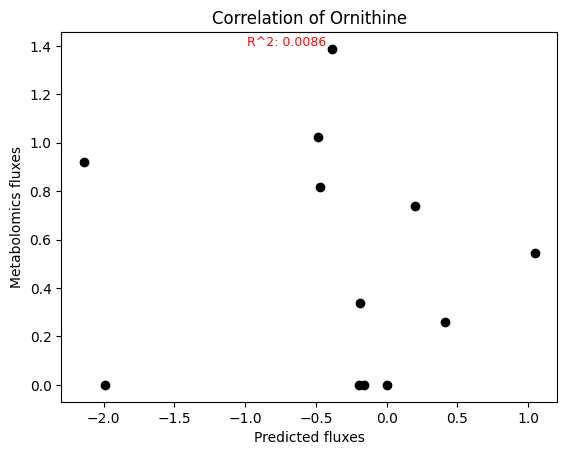

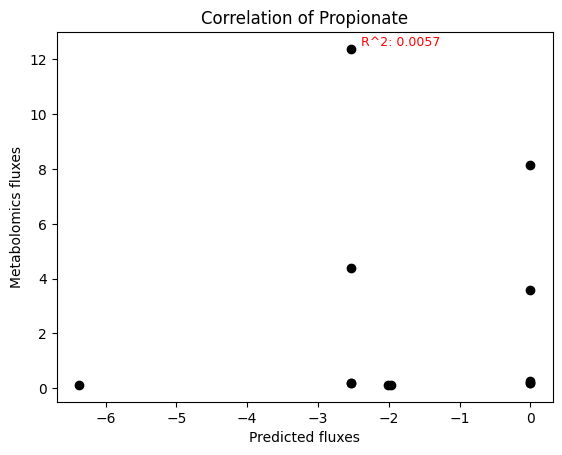

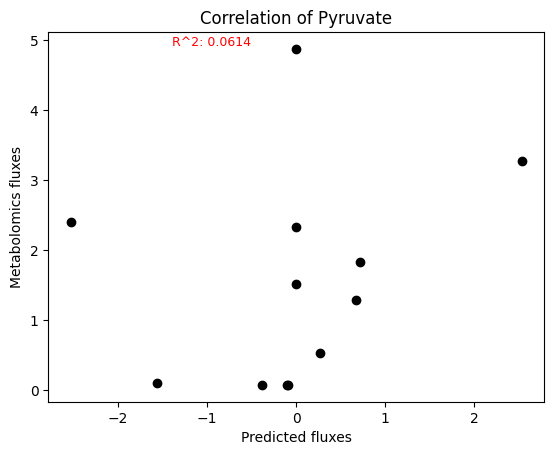

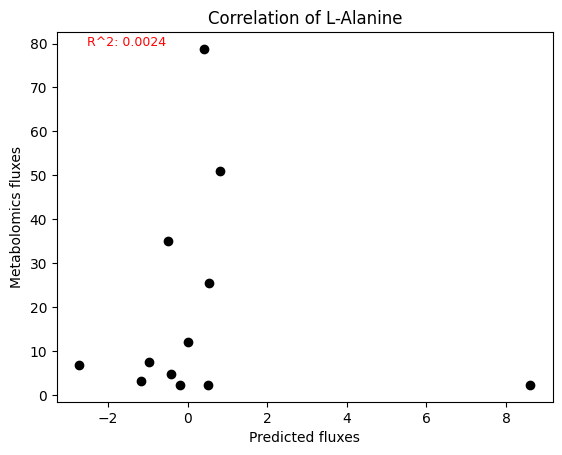

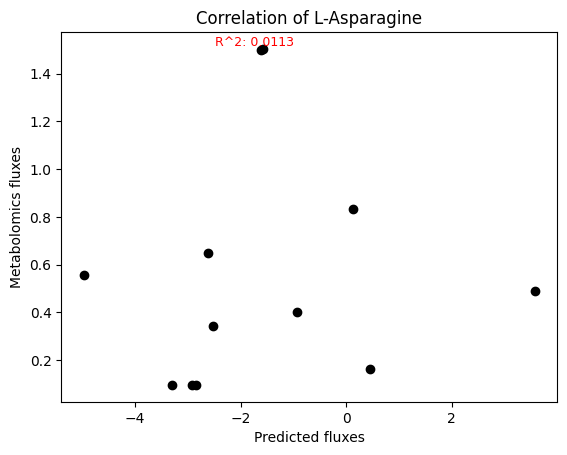

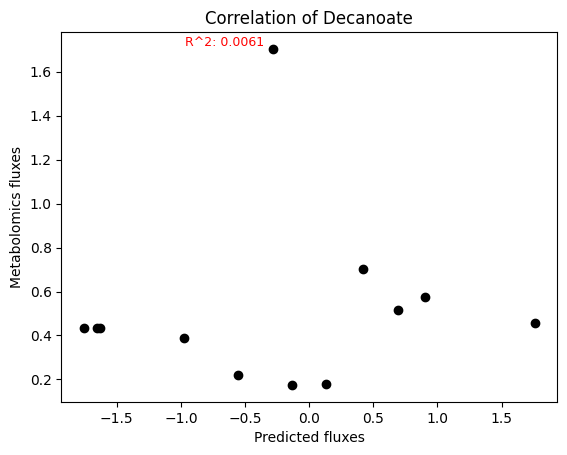

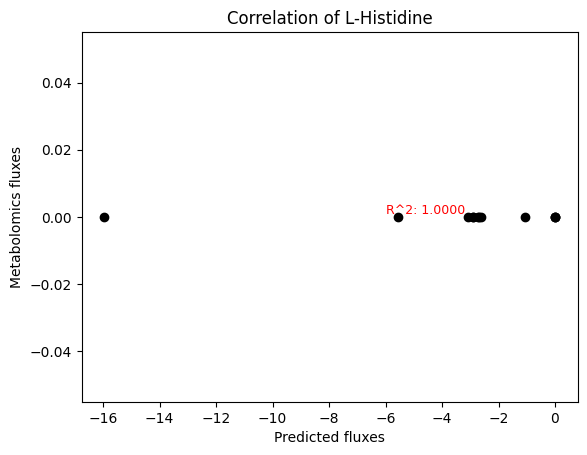

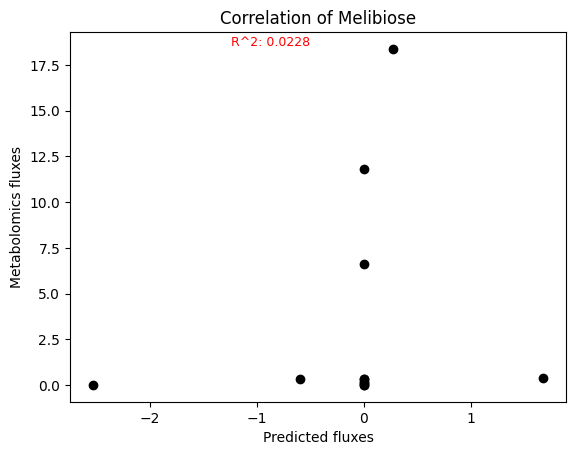

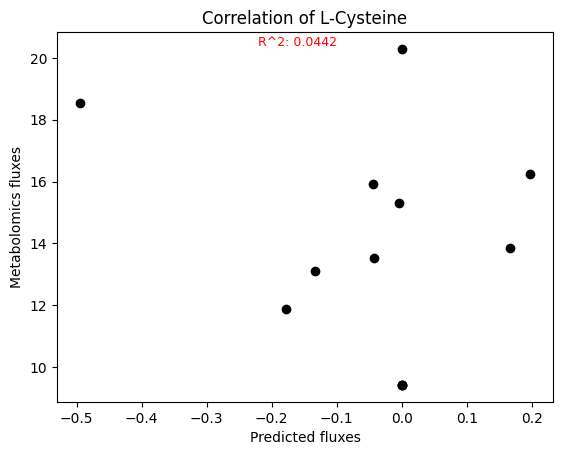

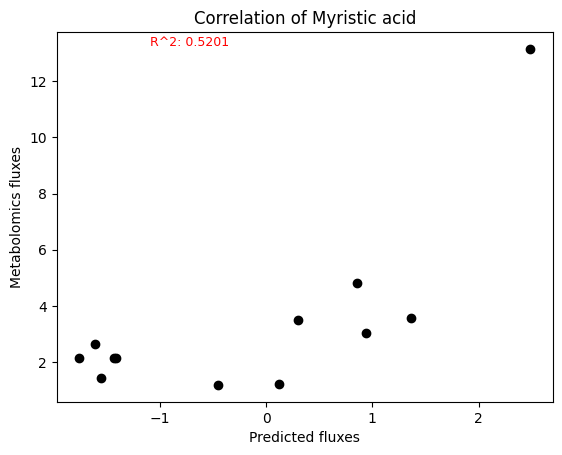

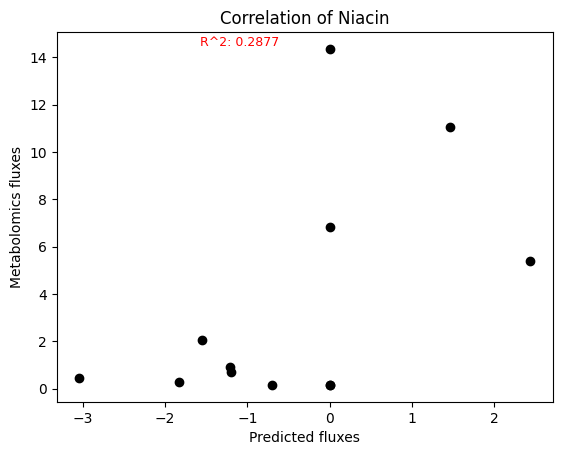

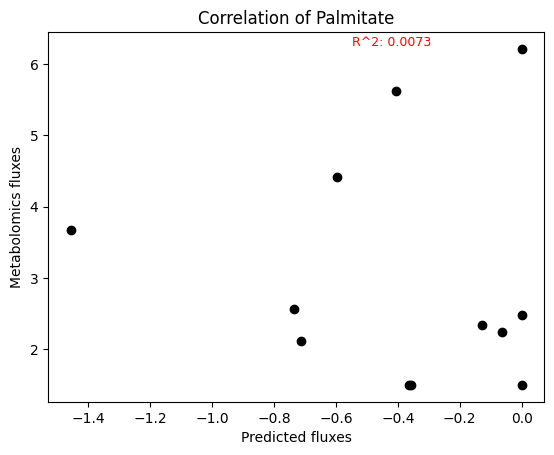

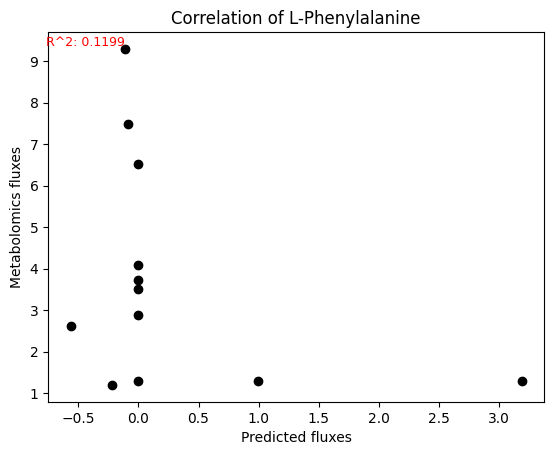

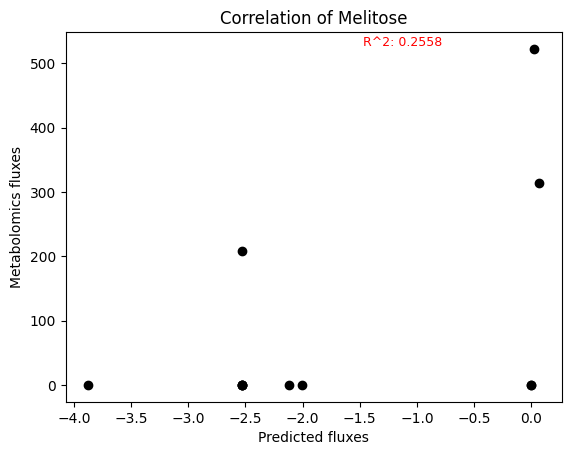

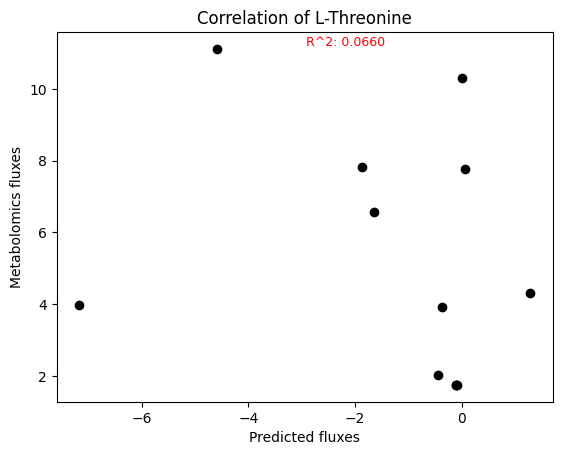

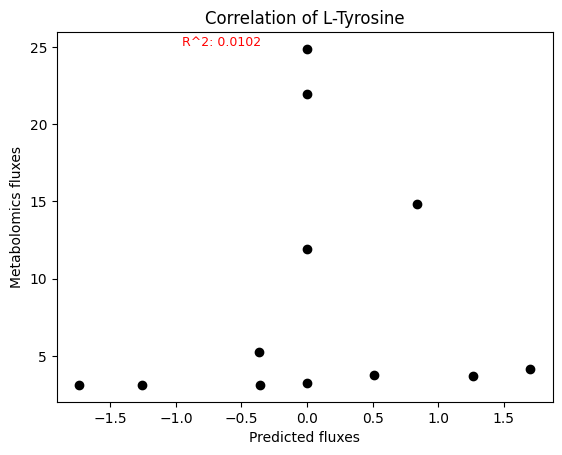

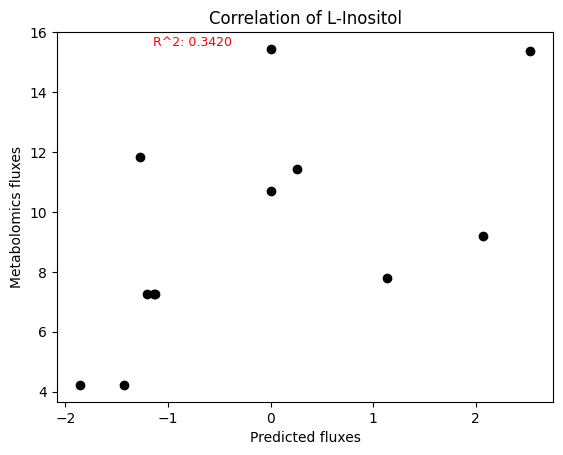

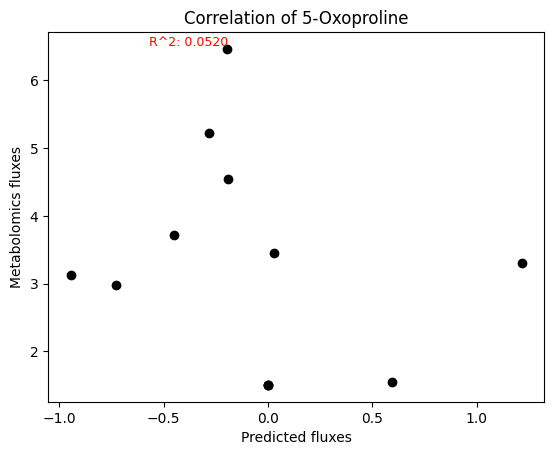

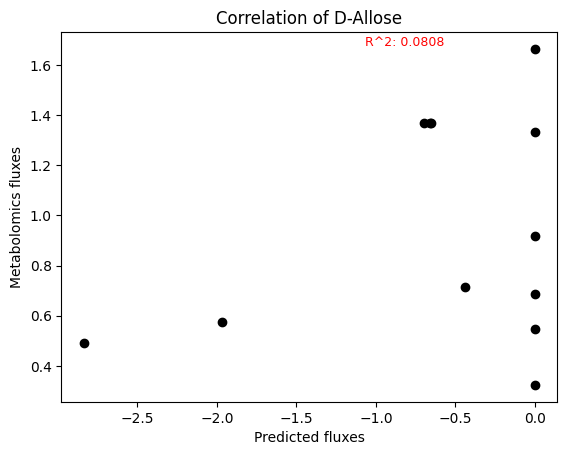

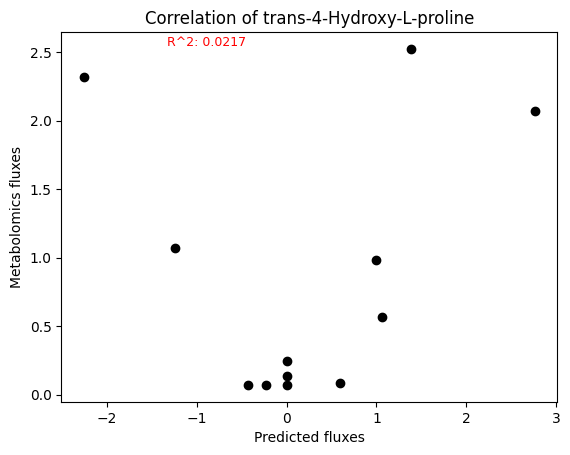

In [26]:
# Initialize the model with no intercept
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
from numpy import array

for compound, content in values.items():
    if compound not in fluxesMetabolomics_mapping:   print(f"The {compound} has not been mapped, and is skipped")  ;  continue

    # Create the scatter plot
    xs, ys = array(list(content.values())).reshape(-1, 1), array(list(measured[fluxesMetabolomics_mapping[compound]].values()))
    model = LinearRegression()
    model.fit(xs, ys)

    # plot the correlation
    pyplot.figure()
    pyplot.scatter(xs, ys, color='black', label='Data Points')

    # Add labels and title
    pyplot.xlabel('Predicted fluxes')
    pyplot.ylabel('Metabolomics fluxes')
    pyplot.title(f'Correlation of {compound}')
    
    # add text labels for each point
    # from adjustText import adjust_text
    # texts = [pyplot.text(xs[i], ys[i], label, fontsize=10, ha='center', va='center') for i, label in enumerate(ys)]
    # adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'), expand=(2.3, 2.3))
    pyplot.text(min(xs)*.2, max(ys), f"R^2: {model.score(xs, ys):.4f}", fontsize=9, ha='right', va='bottom', color='red')
    
    pyplot.savefig(f"correlationFigs/{compound}_fluxMetabolomics_correlation.png")

# processing the MAG-ASV matching

In [1]:
from pandas import read_csv

MAGasv = read_csv("ASV_MAG_SSO_Match.csv").set_index("asv").drop(["mag"], axis=1)
MAGasv.rename(columns={"Unnamed: 5": "precent_diff"}, inplace=True)
MAGasv = MAGasv.iloc[:7].astype(int)
MAGasv

,match_count,asv_unique,mag_unique,precent_diff
asv,,,,
Lactococcus.1,1383,446,8,0
Muribaculum.1,933,336,193,0
Lactobacillus.4,1028,1320,17,0
Bacteroides.3,1498,958,89,0
Bacteroides.3,1493,963,79,0
Bifidobacterium.1,935,3448,40,0
Parabacteroides.1,1598,471,72,0


In [46]:
from matplotlib_venn import venn2

# Create Venn diagram

for index, row in MAGasv.iterrows():
    from matplotlib import pyplot, patheffects
    venn = venn2(subsets=(row["asv_unique"], row["mag_unique"], row["match_count"]),
                 set_colors=('purple', 'green'), set_labels=('ASV', 'MAG'))
    venn.patches[2].set_facecolor('lightgreen')   # Change the fill color
    
    ## update the set labels
    text = pyplot.text(0, 0.6, 'Shared', fontsize=20, ha='center', color='lightgreen')
    text.set_path_effects([
        patheffects.Stroke(linewidth=1, foreground='black'),  # Stroke (outline)
        patheffects.Normal()  # Normal text rendering
    ])
    
    venn.set_labels[0].set_position((-0.7, 0))  # Move label for Set A
    venn.set_labels[0].set_fontsize(20)  # Set font size for Set A
    venn.set_labels[0].set_color('purple')  # Set color for Set A
    venn.set_labels[0].set_path_effects([
        patheffects.Stroke(linewidth=0.5, foreground='black'),  # Add stroke
        patheffects.Normal()  # Render text normally
    ])
    
    venn.set_labels[1].set_position((0.65, 0))   # Move label for Set B
    venn.set_labels[1].set_fontsize(20)  # Set font size for Set B
    venn.set_labels[1].set_color('green') # Set color for Set B
    venn.set_labels[1].set_path_effects([
        patheffects.Stroke(linewidth=0.5, foreground='black'),  # Add stroke
        patheffects.Normal()  # Render text normally
    ])
    
    ## update the numbers
    for i, label in enumerate(venn.subset_labels):
        if label:  # Check if the label exists
            # if i == 2:
            #     label.set_text("Shared: 2 items")
            label.set_fontsize(17)     # Change font size
            label.set_color('black')    # Change font color
    
    # Display the plot
    # pyplot.title("2-Set Venn Diagram")
    pyplot.savefig(f"{index}_Venn.png", dpi=300, bbox_inches='tight', transparent=True)
    pyplot.close()